# CIA Country Analysis and Clustering


## Goal:

### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1hIK-v0g3GH9Lg3dvr0HOFL-qywA6qqc-

Downloading...
From: https://drive.google.com/uc?id=1hIK-v0g3GH9Lg3dvr0HOFL-qywA6qqc-
To: /content/CIA_Country_Facts.csv
100% 33.5k/33.5k [00:00<00:00, 57.6MB/s]


In [3]:
df = pd.read_csv('/content/CIA_Country_Facts.csv')

In [4]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

* We have a few columns with null values.
* We will analize all these and decide how we will impute them or if we will drop them.

In [7]:
len(df[df.duplicated()])

0

* There are no Duplicate values in out dataset

In [8]:
df['Region'].value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

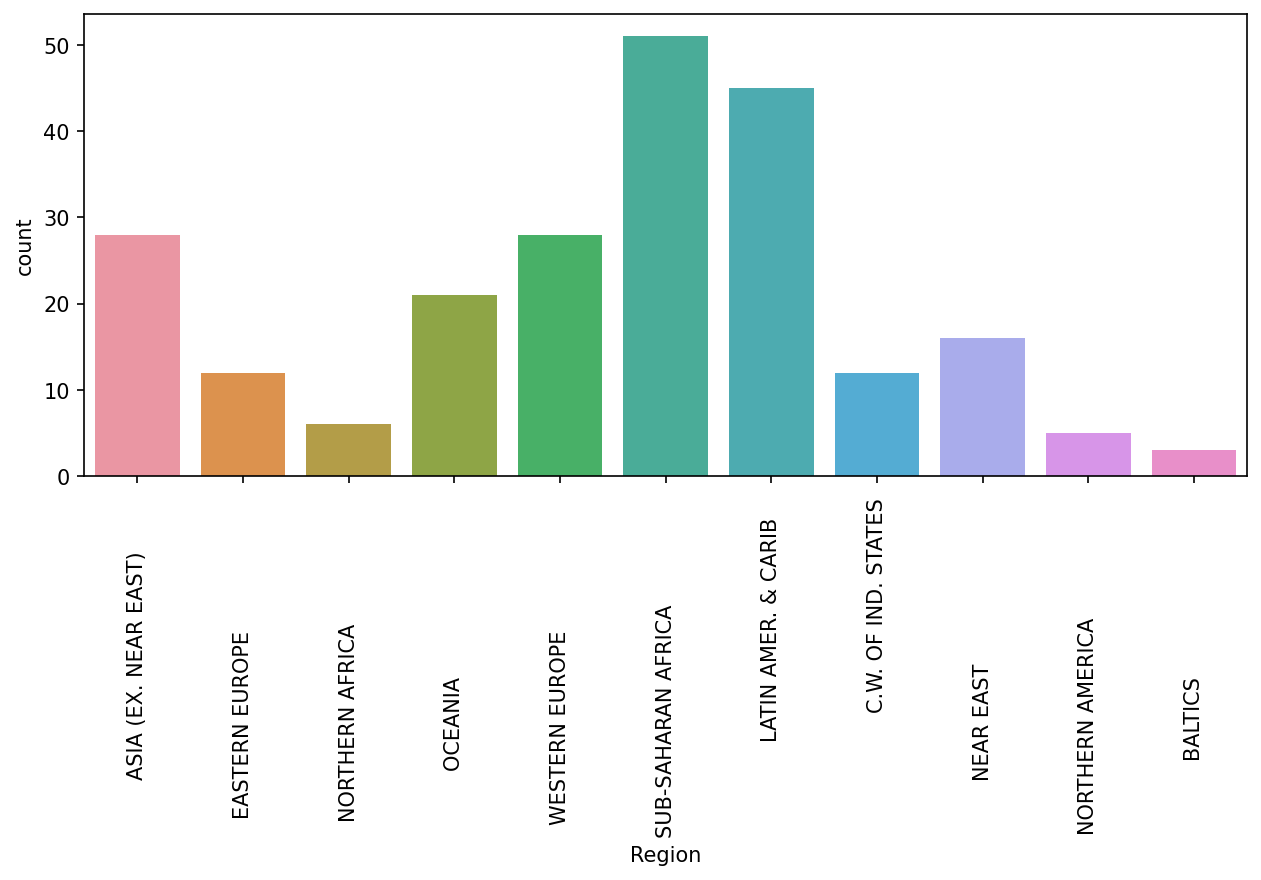

In [9]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x='Region',data=df)
plt.xticks(rotation=90);

* Looks like Sub-Saharan Africa and Latin Amer. & Carib are the regions with the highest number of countries compared to rest
* Baltics and Northern America are the regions with lowest number of countries

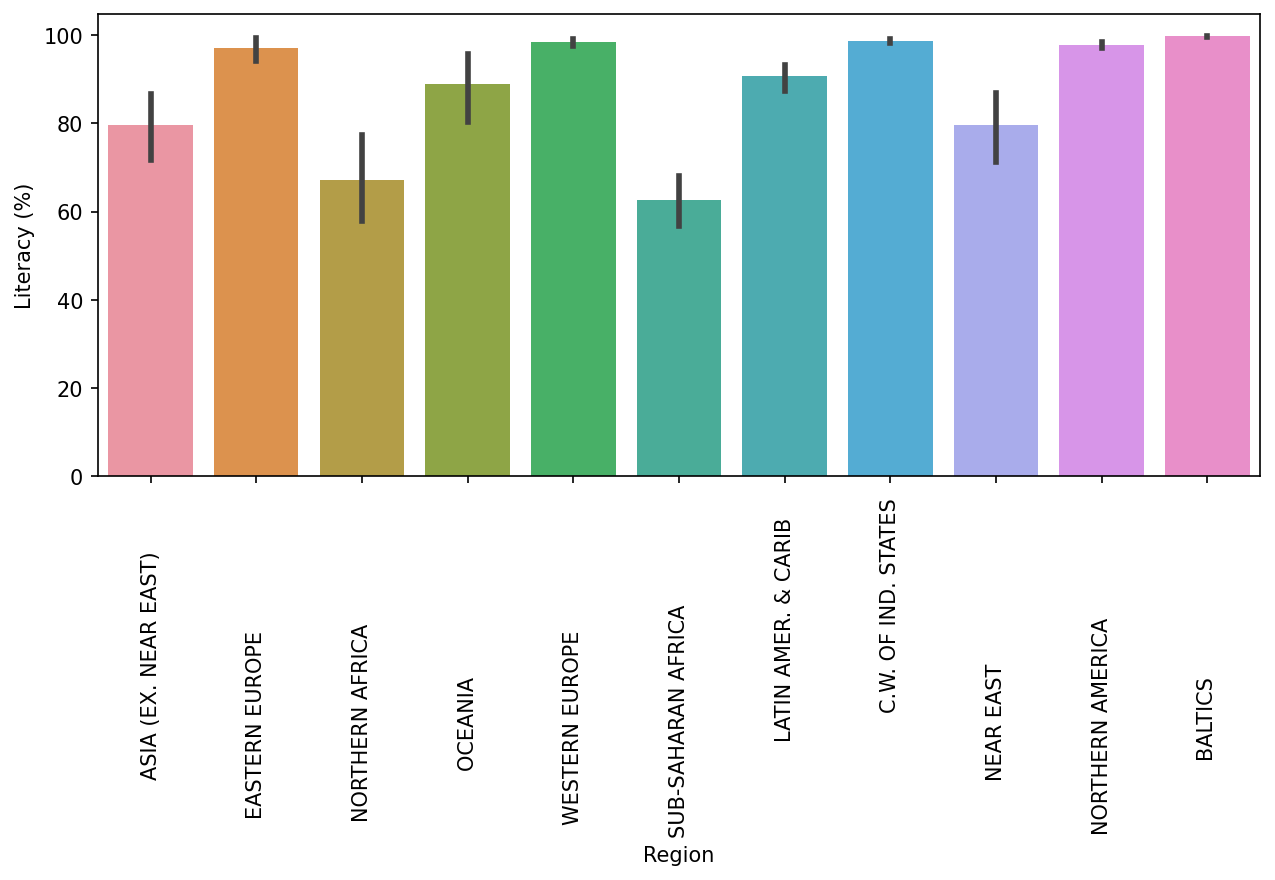

In [10]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x='Region',y='Literacy (%)',data=df)
plt.xticks(rotation=90);

* Looks like Northen Africa and sub saharan africs are regions with lowest literacy rates
* Eastern Europe,western Europe,C.W of IND States,Northen America,Balitics are Regions with highest literacy rates

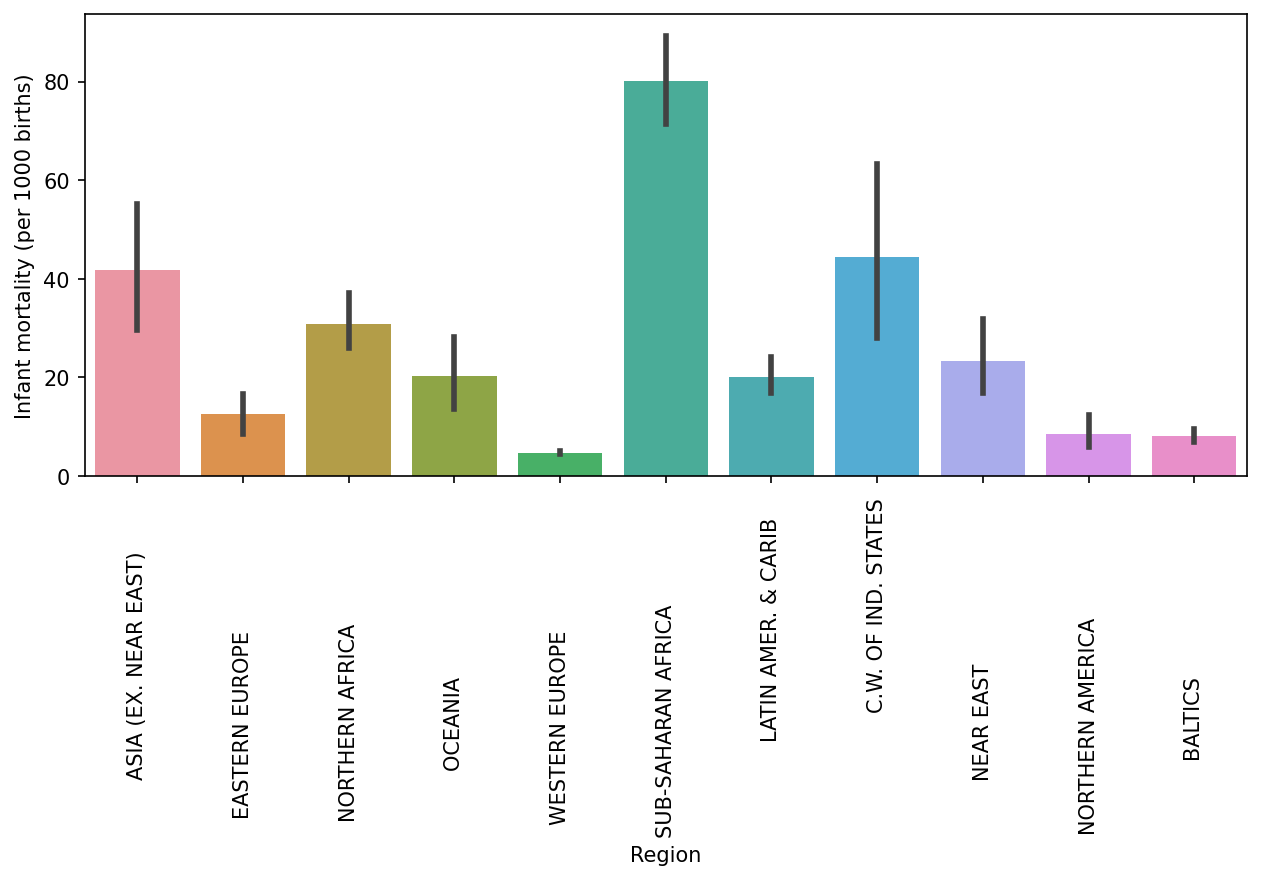

In [12]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x='Region',y='Infant mortality (per 1000 births)',data=df)
plt.xticks(rotation=90);

* Sub saharan Africa,C.W of IND States,Asis are theregions with highest infant mortality rates
* Western europe,Eastern europe, Northern America,Baltics are the regions with lowest infant mortality rates

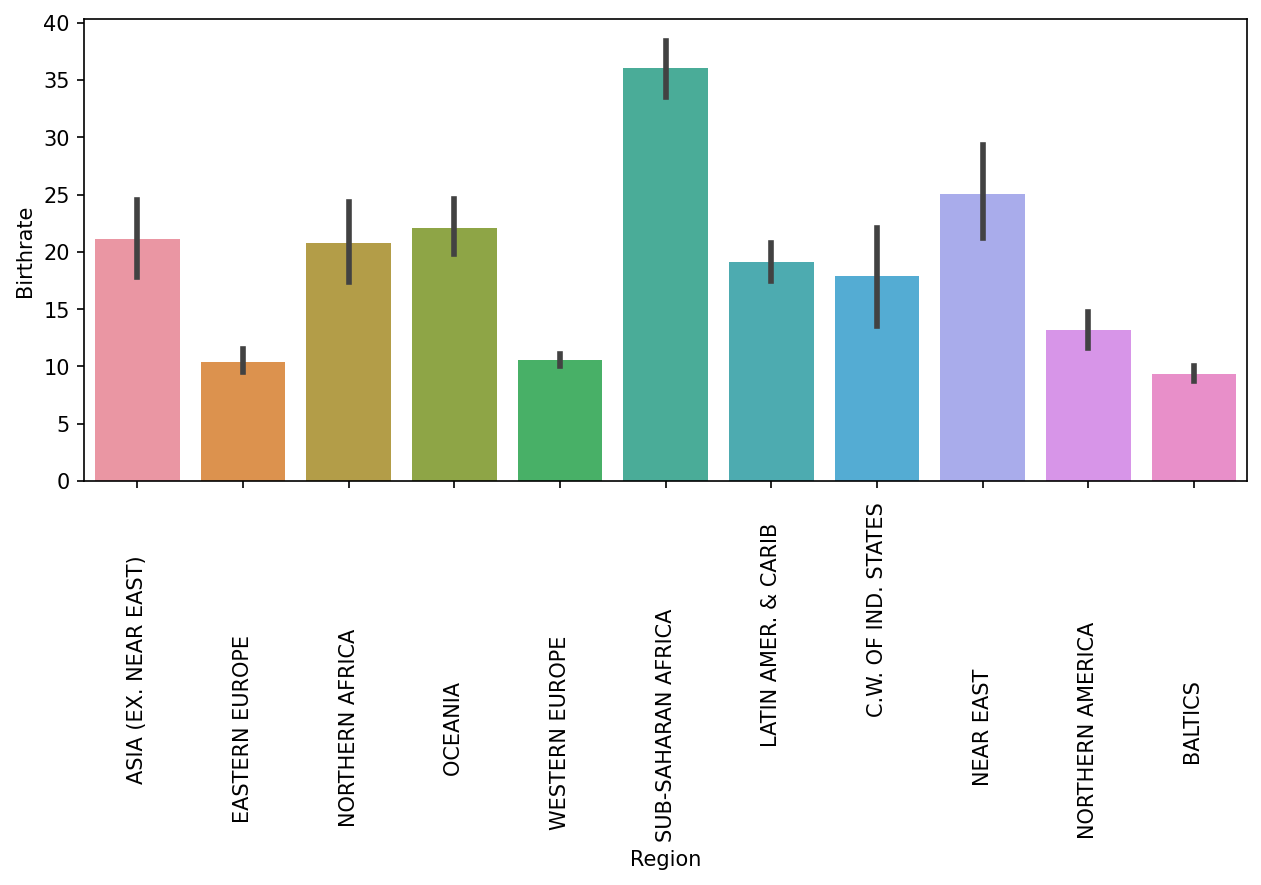

In [14]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x='Region',y='Birthrate',data=df)
plt.xticks(rotation=90);

* Looks like Sub Saharan Africa has the highest birth rate
* Balitics , eeastern and western Europe are regions with lowest birthrate

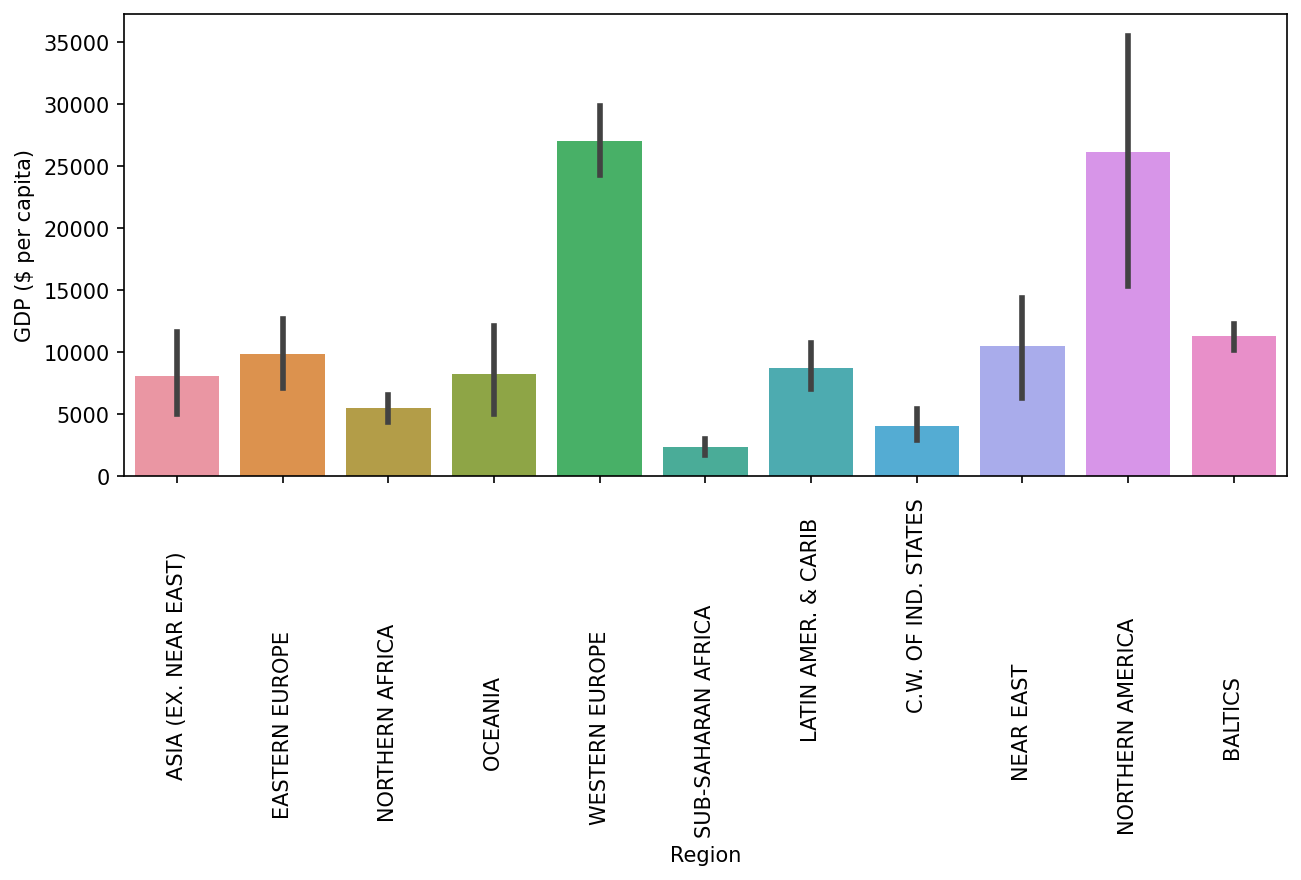

In [15]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x='Region',y='GDP ($ per capita)',data=df)
plt.xticks(rotation=90);

* Looks like western europe and Northen america are the regions with highest GDP per capita
* Sub saharan Africa has the least GDP per capita

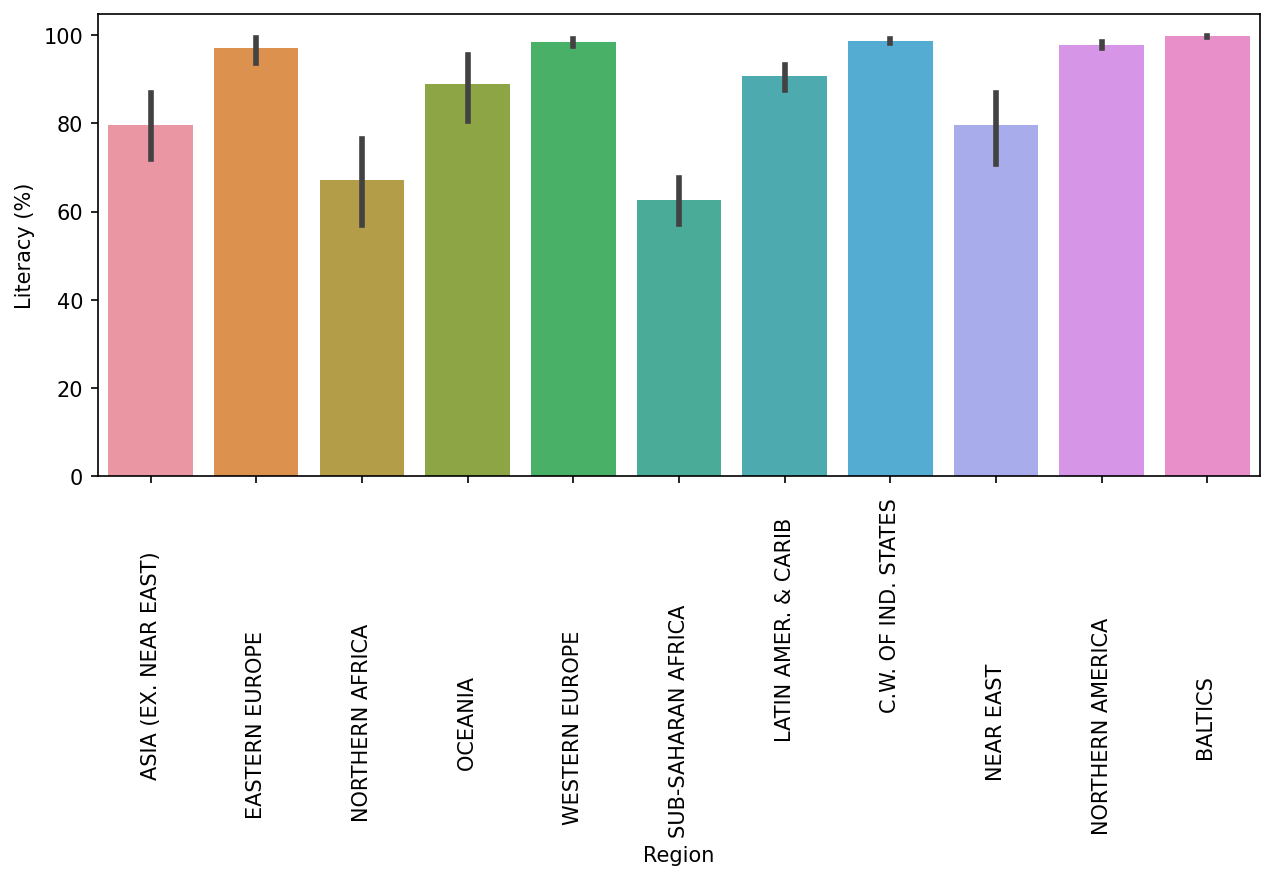

In [16]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x='Region',y='Literacy (%)',data=df)
plt.xticks(rotation=90);

* Looks like sub Saharan and Northen africa has the least Literacy Rate

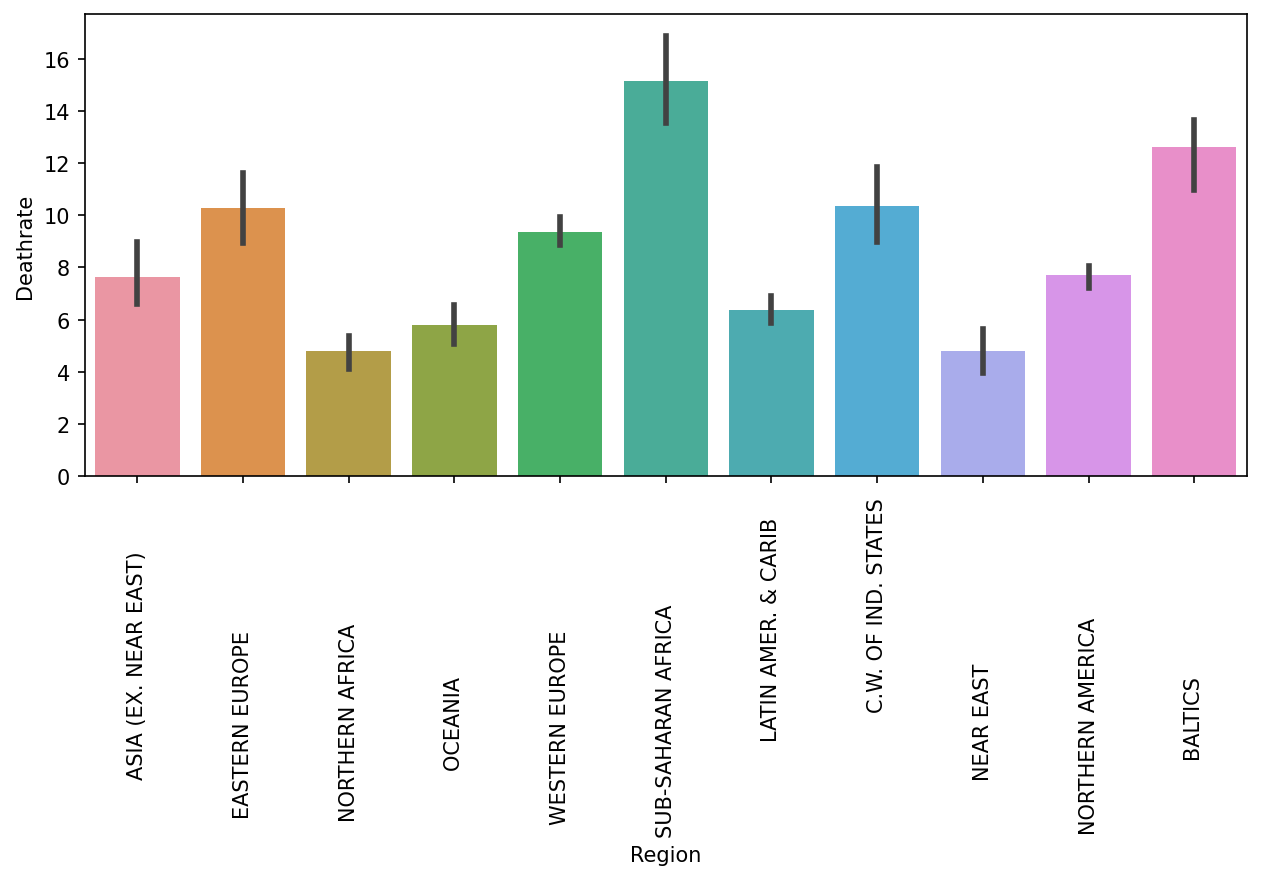

In [17]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x='Region',y='Deathrate',data=df)
plt.xticks(rotation=90);

* Sub Saharan Afric and Baltics Have the highest Death rate
* North africa and Near eats have the least Death rate

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


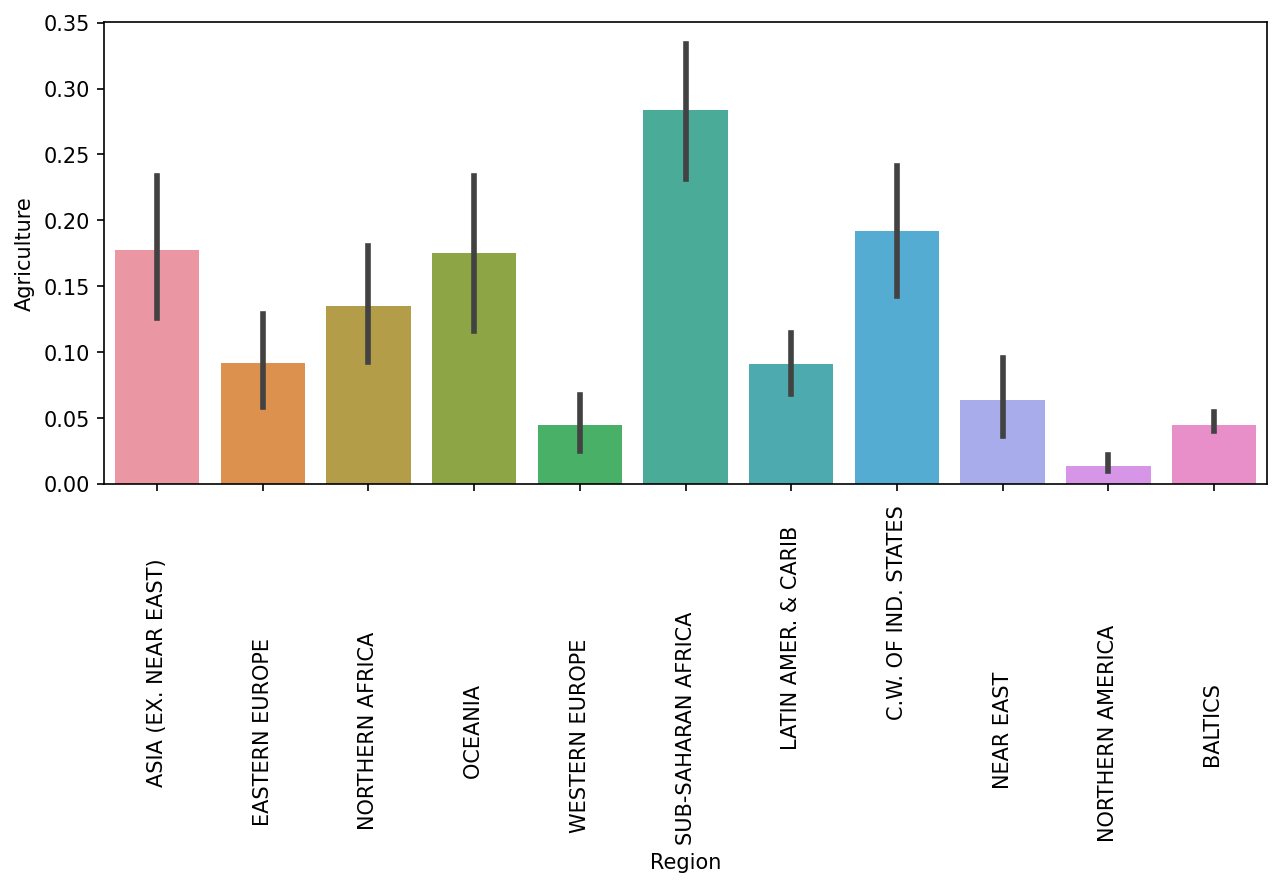

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x='Region',y='Agriculture',data=df)
plt.xticks(rotation=90);

* Sub saharan Africa, ac, C.W of IND States,Aceana,Asia are the the regions with high Agriculture
* Western Europe and Northen America are regions with lowest Agriculture

<Figure size 1500x600 with 0 Axes>

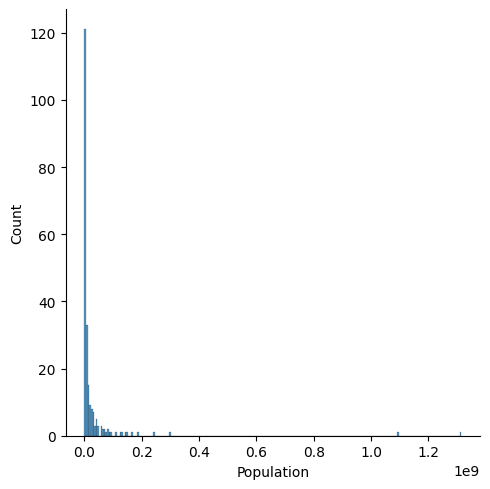

In [19]:
plt.figure(figsize=(10,4),dpi=150)
sns.displot(df['Population'])

(0.0, 50000000.0)

<Figure size 1500x600 with 0 Axes>

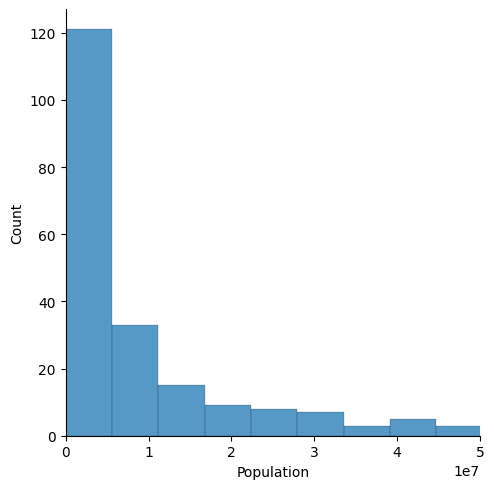

In [20]:

plt.figure(figsize=(10,4),dpi=150)
sns.displot(df['Population'])
plt.xlim(0,0.05e9)

* We can see that most of the countries have a population of less than 10000000 people
* the plot is skewed this could be because there are countries like china and india where population is population is much higher compared to rest of the world

<Figure size 1500x600 with 0 Axes>

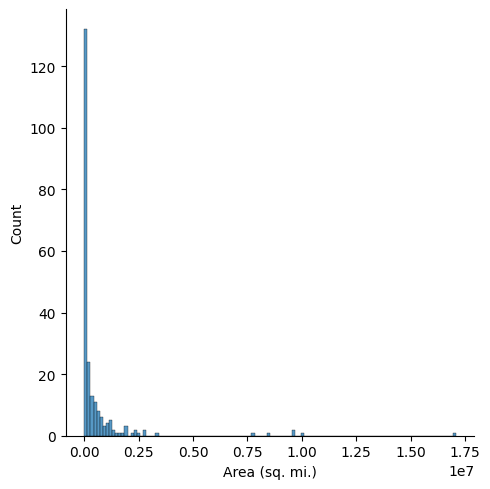

In [21]:
plt.figure(figsize=(10,4),dpi=150)
sns.displot(df['Area (sq. mi.)'])
# plt.xlim(0,0.05e9)

(0.0, 5000000.0)

<Figure size 1500x600 with 0 Axes>

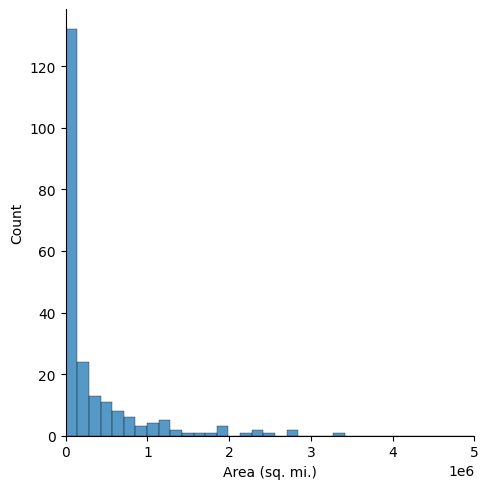

In [ ]:

plt.figure(figsize=(10,4),dpi=150)
sns.displot(df['Area (sq. mi.)'])
plt.xlim(0,0.005e9)

* Most countries have an area of less than 1000000 square miles

<Axes: xlabel='Pop. Density (per sq. mi.)', ylabel='Literacy (%)'>

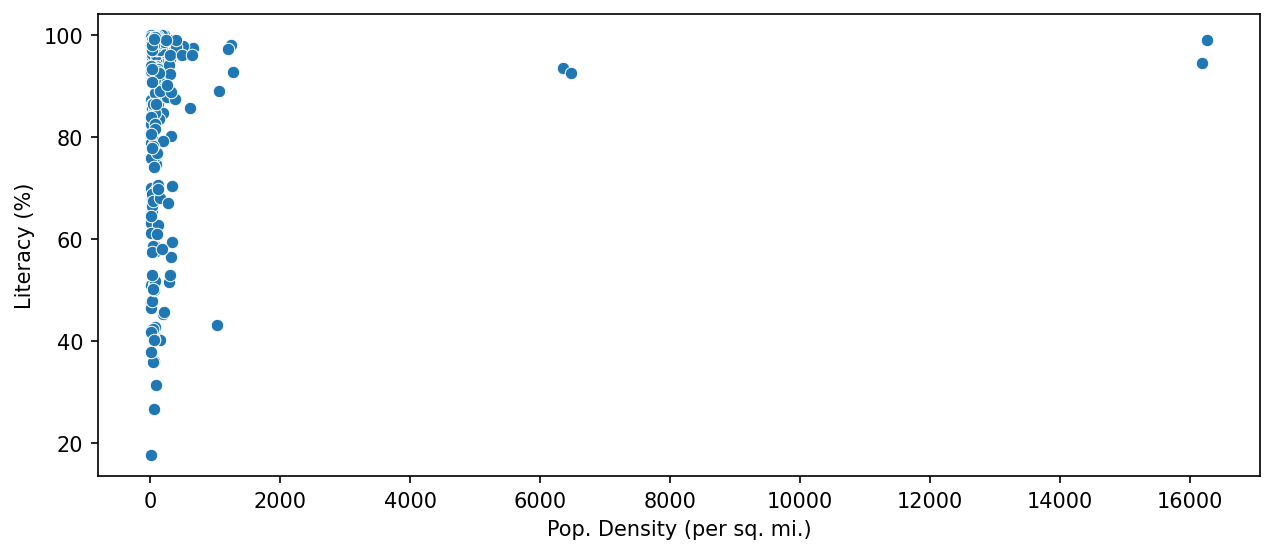

In [22]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='Pop. Density (per sq. mi.)',y='Literacy (%)',data=df)

(0.0, 1000.0)

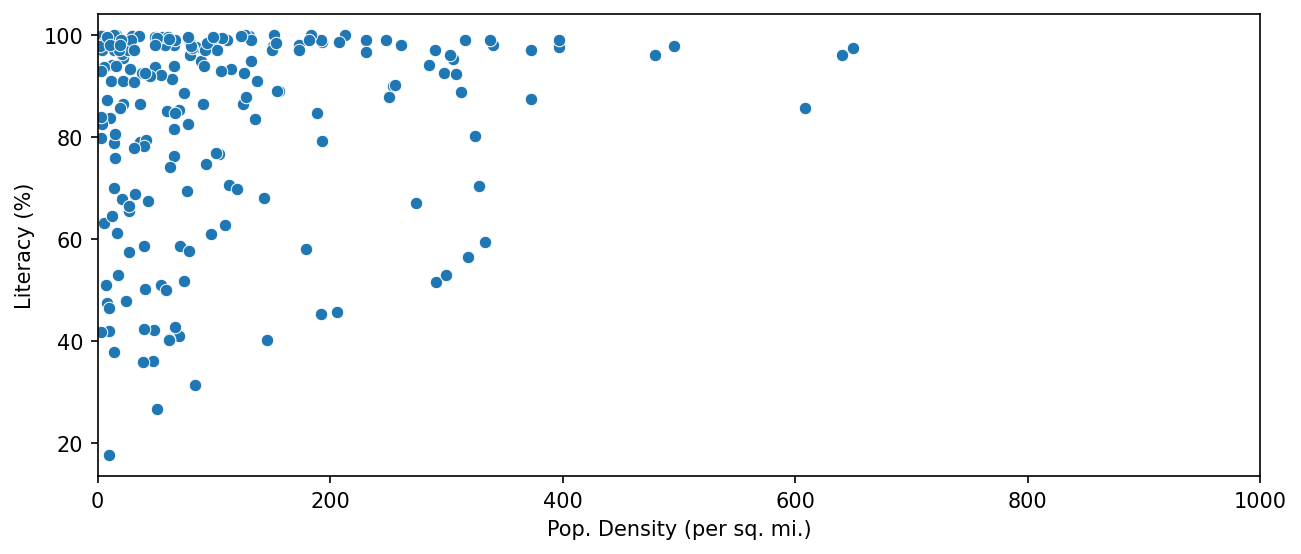

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='Pop. Density (per sq. mi.)',y='Literacy (%)',data=df)
plt.xlim(0,1000)

* We can see Literacy rate is slightly increasing as population density is increasing

(0.0, 1000.0)

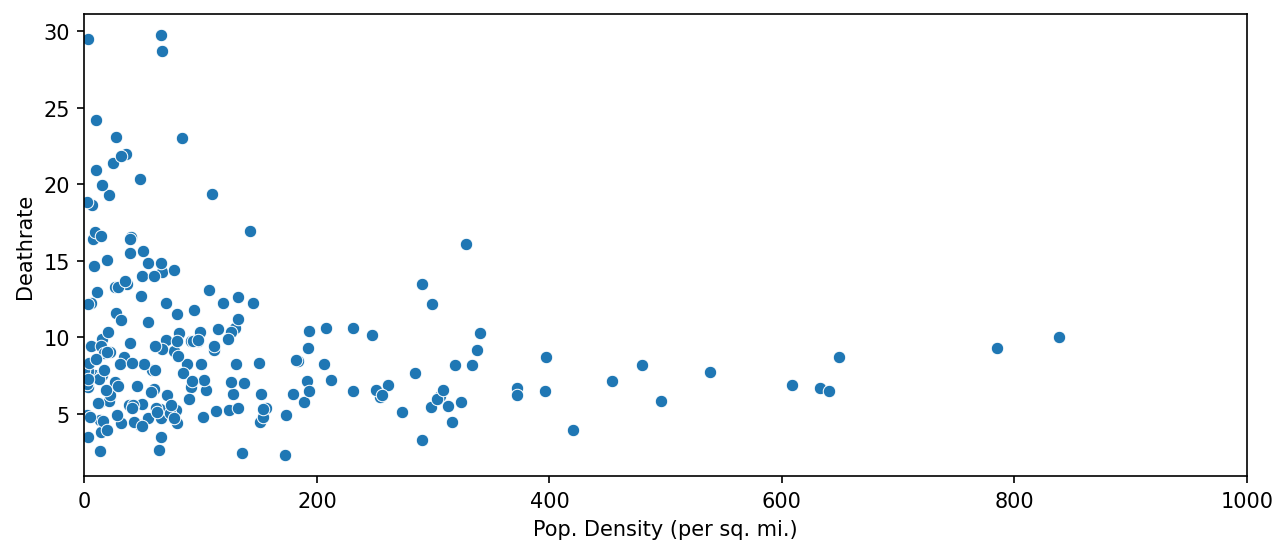

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='Pop. Density (per sq. mi.)',y='Deathrate',data=df)
plt.xlim(0,1000)

* We can see that death rate is slightly decreasing as population density increases

<Axes: xlabel='Coastline (coast/area ratio)', ylabel='Industry'>

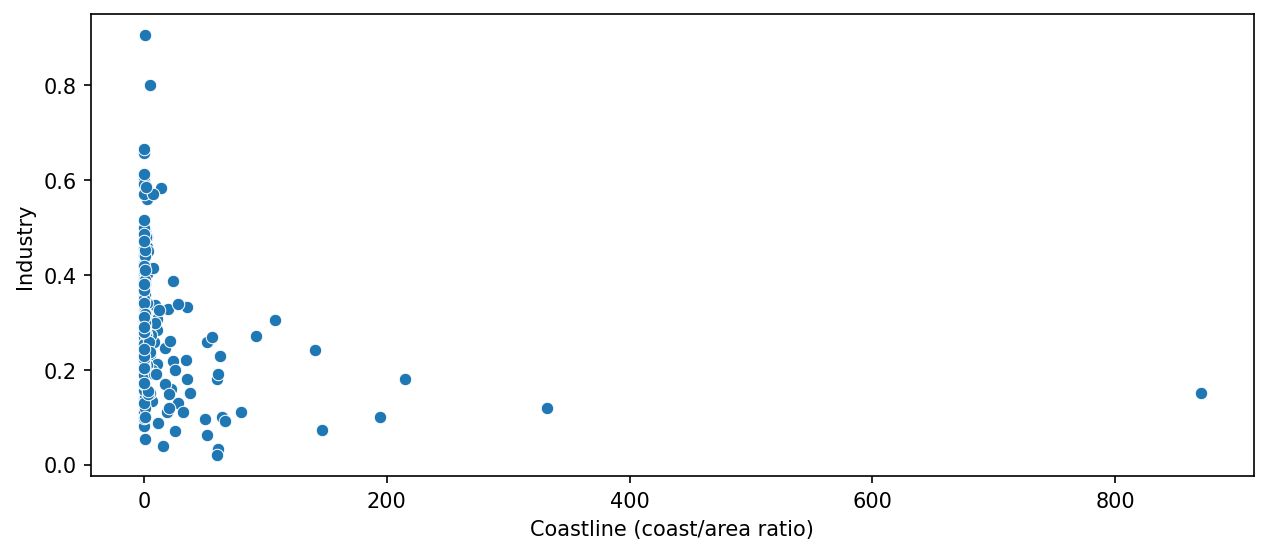

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='Coastline (coast/area ratio)',y='Industry',data=df)

<Axes: xlabel='Net migration', ylabel='Pop. Density (per sq. mi.)'>

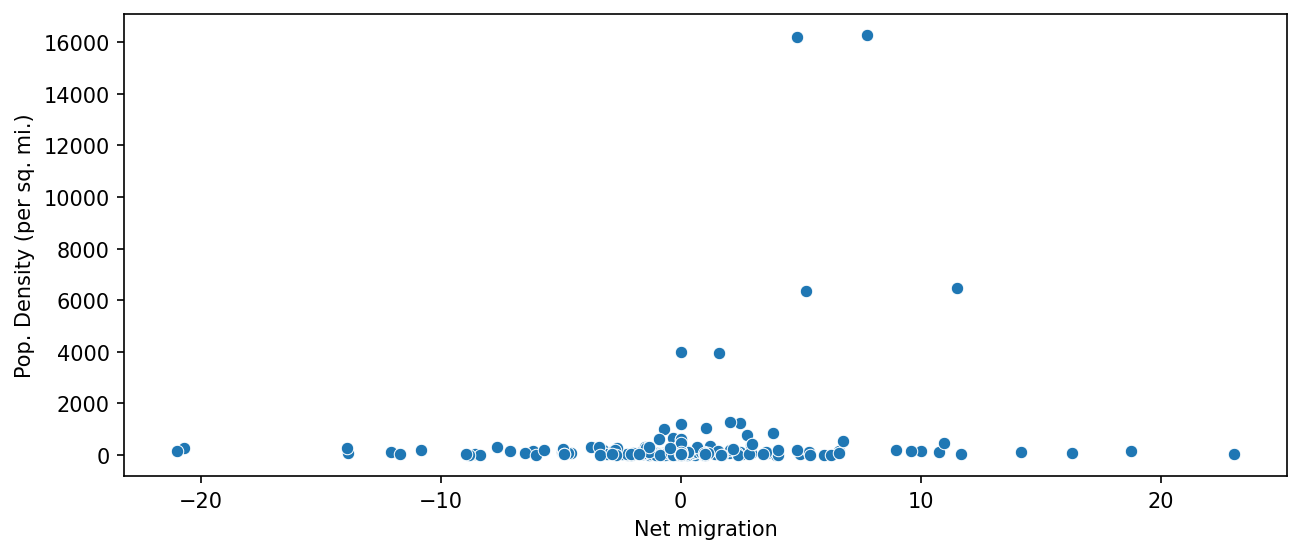

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='Net migration',y='Pop. Density (per sq. mi.)',data=df)

* We can see that in a few rare cases when net migration increases population density increases

<Axes: xlabel='Literacy (%)', ylabel='Infant mortality (per 1000 births)'>

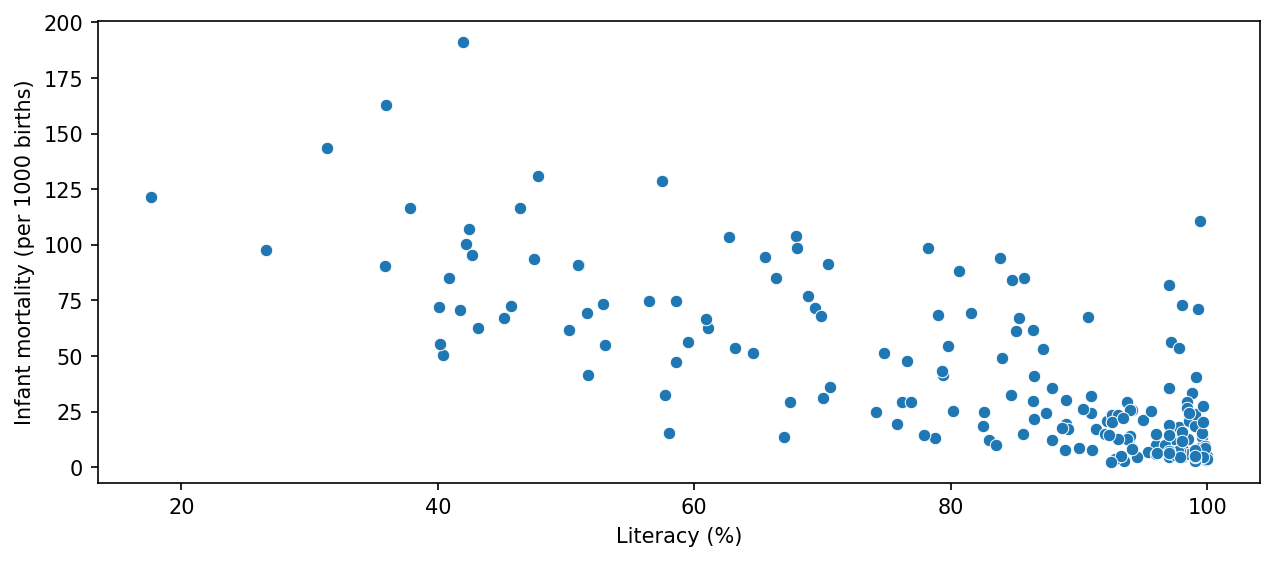

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='Literacy (%)',y='Infant mortality (per 1000 births)',data=df)

* We can see that as literacy increases, infant mortality decreases.
* This could be because as literacy increases people will have more knowledge about treating any medical complications if anything arises
* In the earlier analysis above we saw that african region had the lowest literacy and highest infant mortality rates

<Axes: xlabel='Literacy (%)', ylabel='GDP ($ per capita)'>

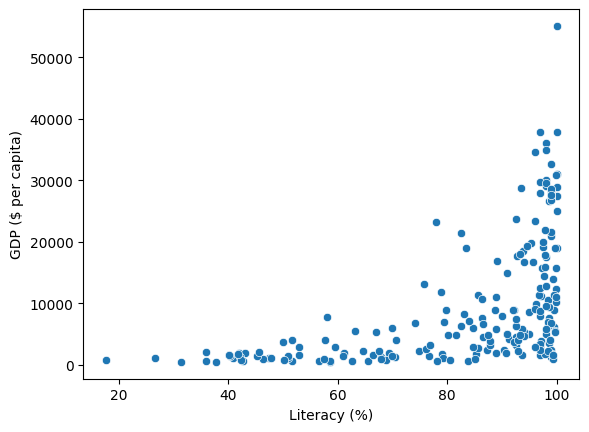

In [ ]:
sns.scatterplot(y='GDP ($ per capita)', x= 'Literacy (%)',data=df)

* We can see that as literacy increases GDP per capita also increases
* this could be because as more people are getting more skilled they are able to work better jobs and earn more and contribute more to the country through taxes

<ipython-input-29-db1be202b6c2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

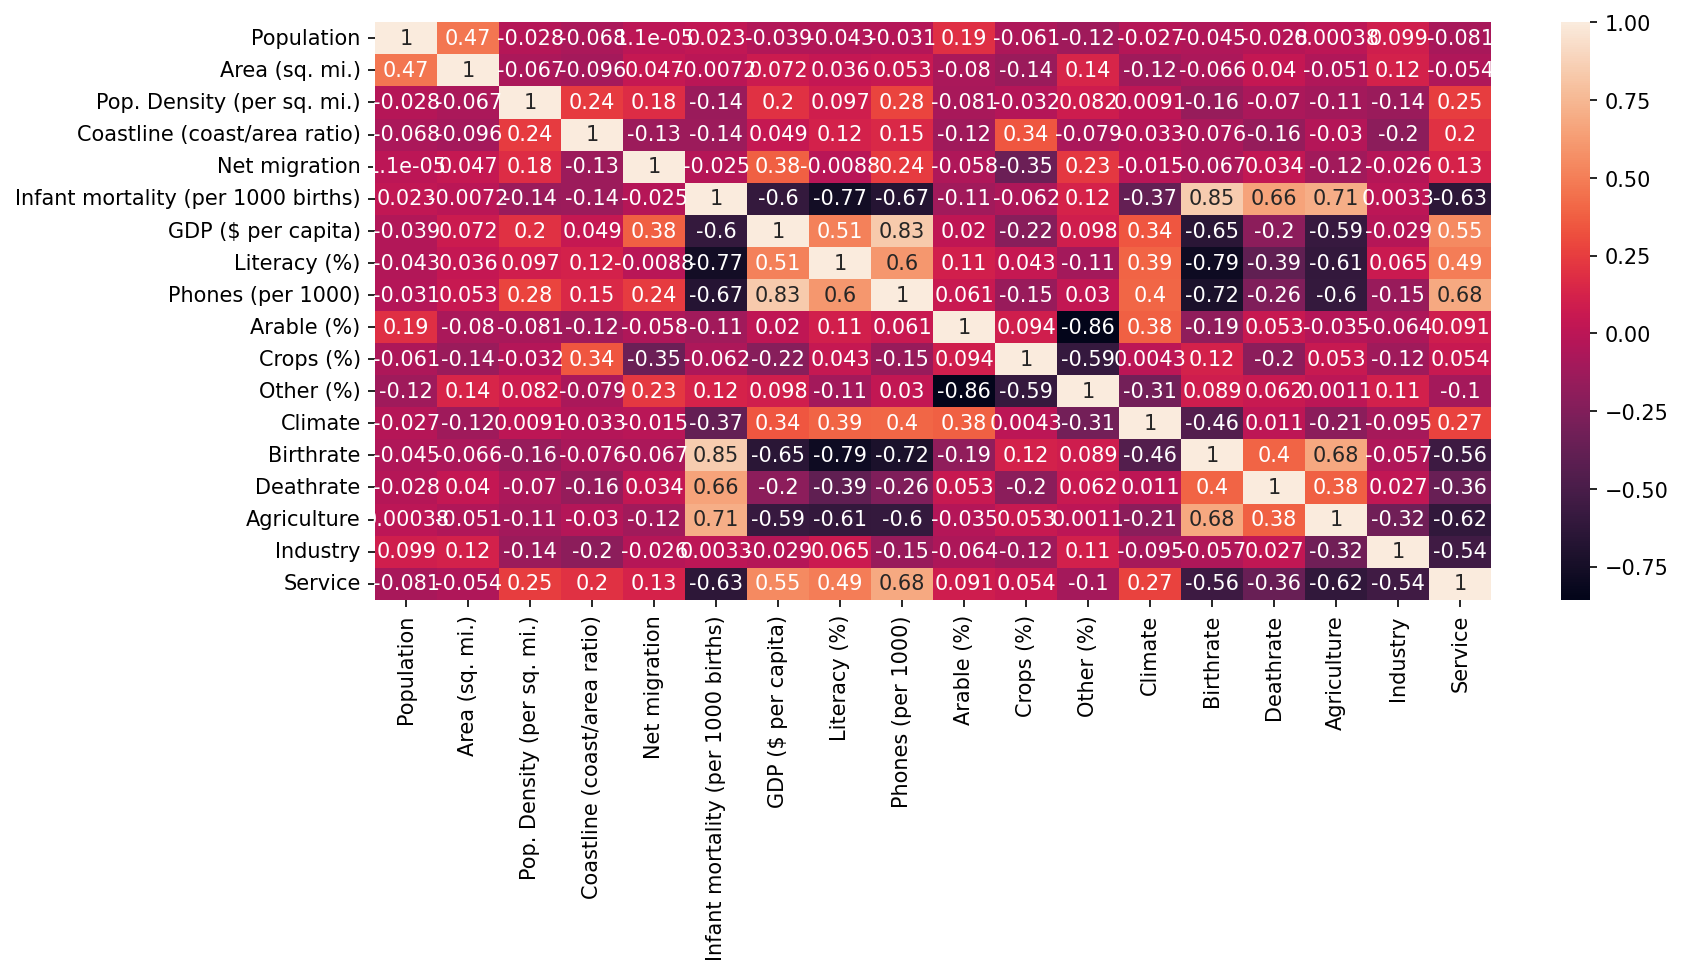

In [ ]:
plt.figure(figsize=(12,5),dpi=150)
sns.heatmap(df.corr(),annot=True)

* We can see that Infant mortality,literacy,Birthrate are correlated
* We can see GDP is highly correlated to phones(per 1000), This could be because are people in country start getting richer they will be able to afford phones
* We can see thar arable(meaning - Fit for cultivation) is highly correlated to other % feature

<ipython-input-30-b7b834a56c94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr())


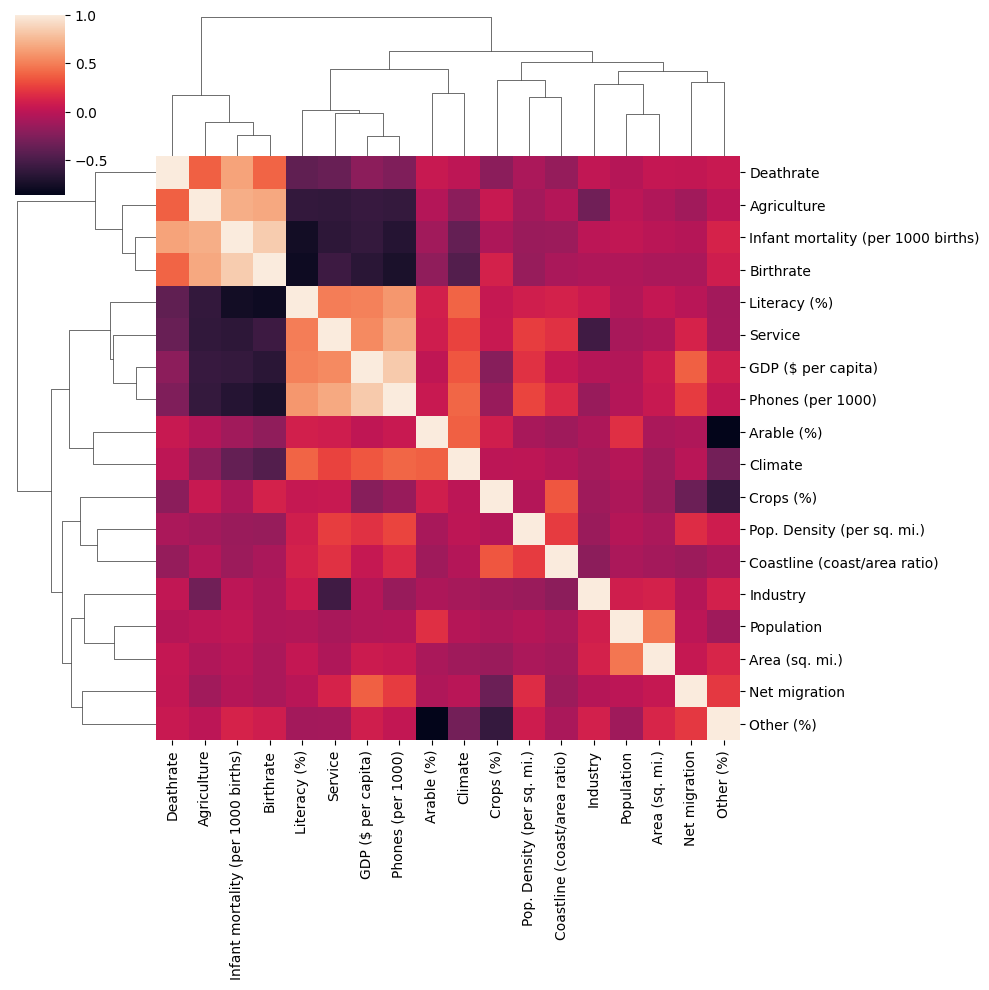

In [ ]:
sns.clustermap(df.corr())

In [23]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [29]:
def null_perc(df):
  null_perc = (100*df.isnull().sum()/len(df)).sort_values()
  null_perc = null_perc[null_perc>0]

  plt.figure(figsize=(10,5),dpi=150)
  sns.barplot(x = null_perc.index,y=null_perc)
  plt.xticks(rotation=90);

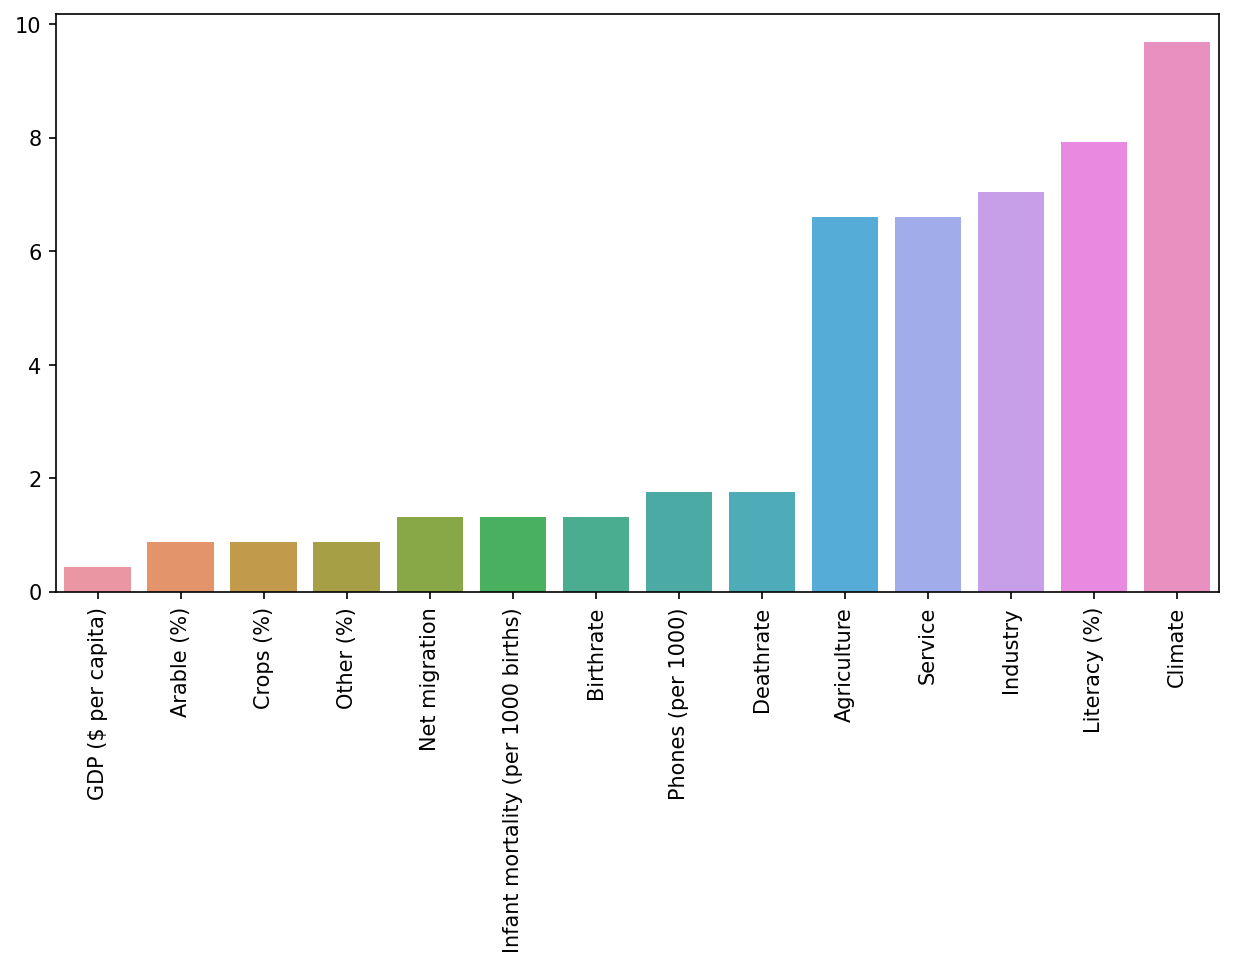

In [30]:
null_perc(df)

In [31]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

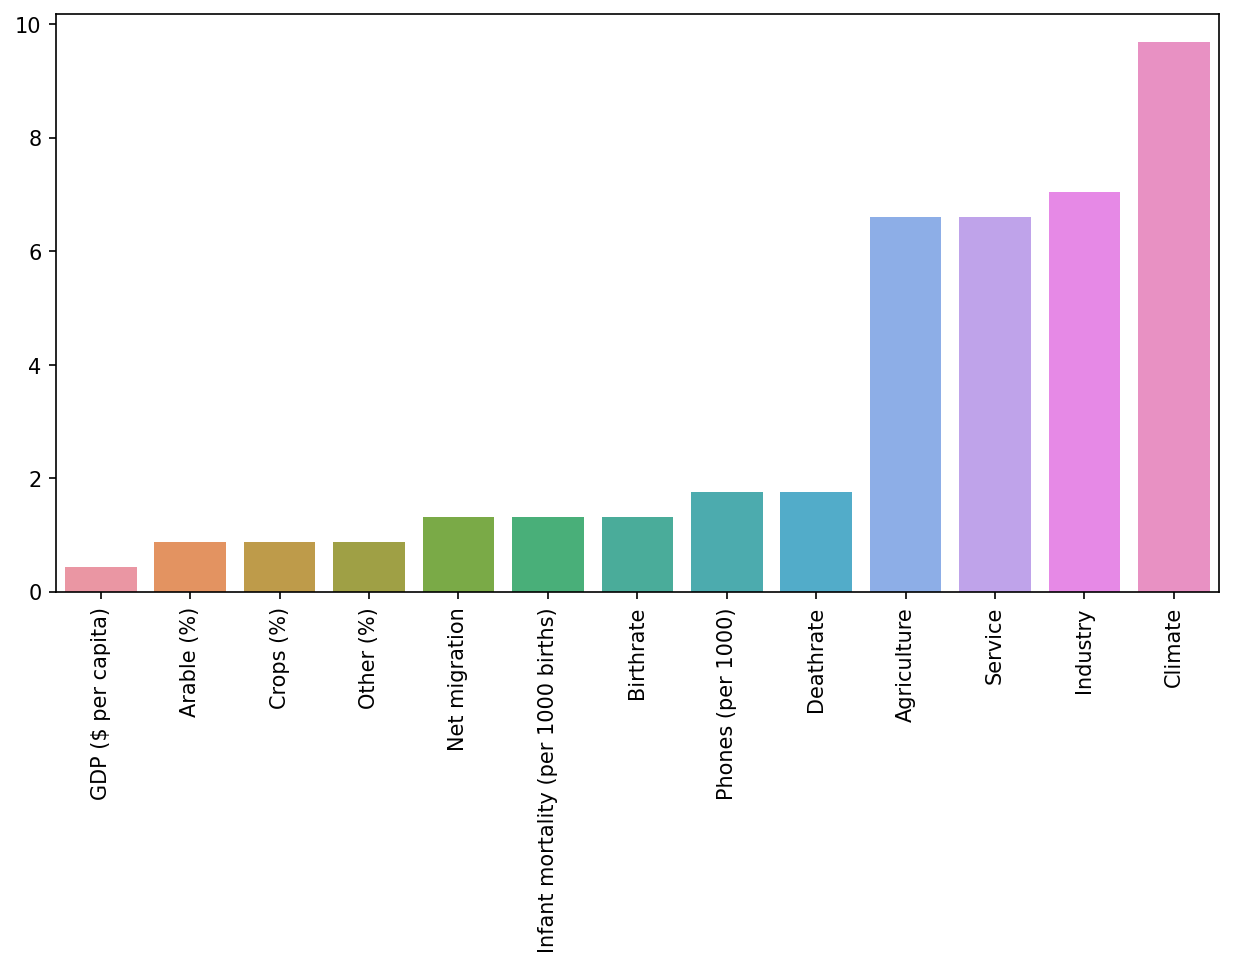

In [32]:
null_perc(df)

In [33]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [34]:
df[df['Agriculture'].isnull()][['Country','Area (sq. mi.)']]

,Country,Area (sq. mi.)
3,American Samoa,199
4,Andorra,468
78,Gibraltar,7
80,Greenland,2166086
83,Guam,541
134,Mayotte,374
140,Montserrat,102
144,Nauru,21
153,N. Mariana Islands,477
171,Saint Helena,413


* Upon searching in gogle about these countries, i have found out that most of them are only small islands and therefore with such small plpace agricultyure would be very difficult, so i will fill its value as 0
* Upon research I found that Greenland's agriculture is of little importance in its economy, so i will fill its value as 0
* The sahara region is mostly desert so agriculture is very difficult in that region, so i will fill its value as 0


In [35]:
df['Agriculture'] = df['Agriculture'].fillna(0)

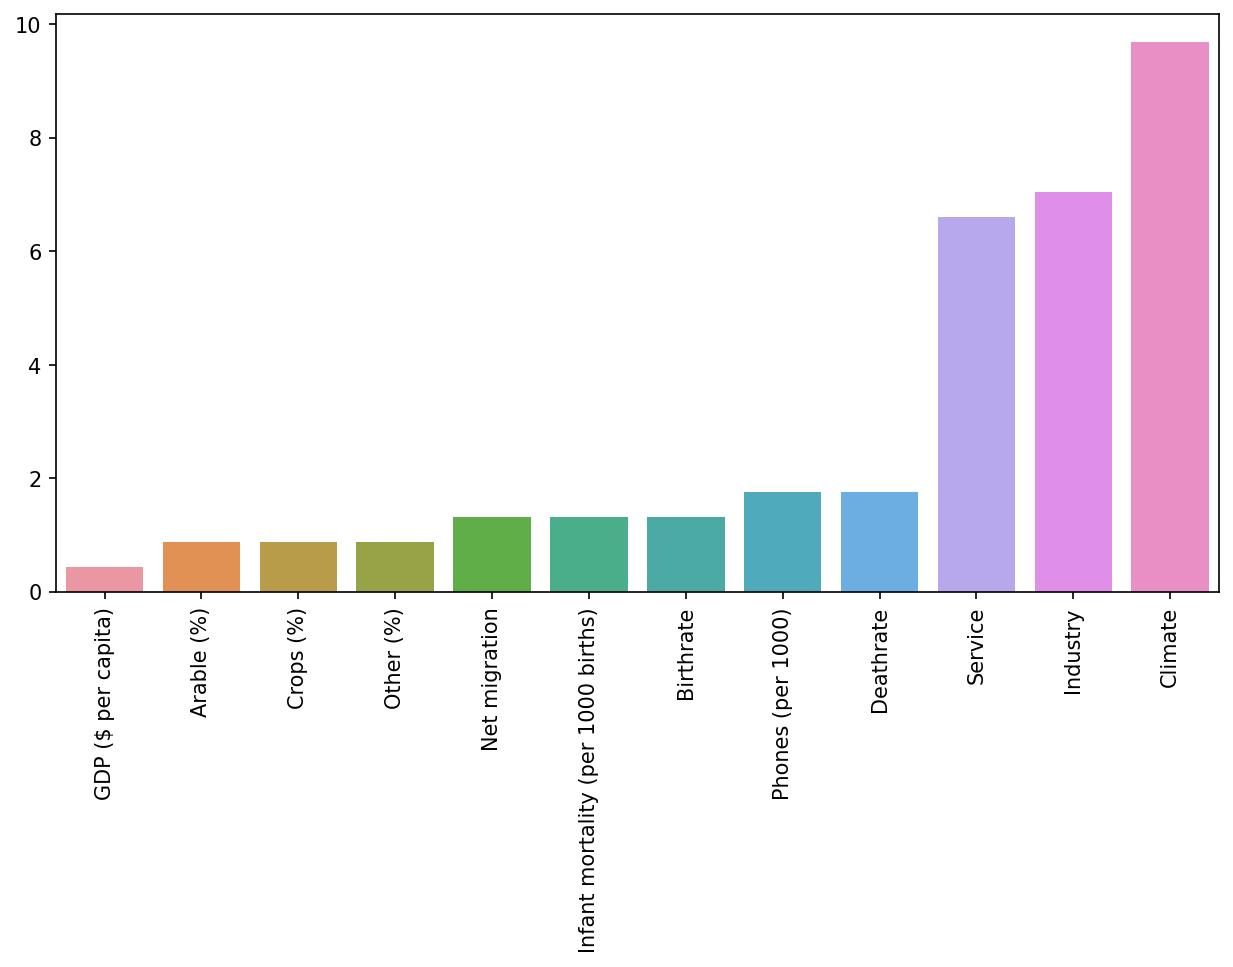

In [36]:
null_perc(df)

In [37]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

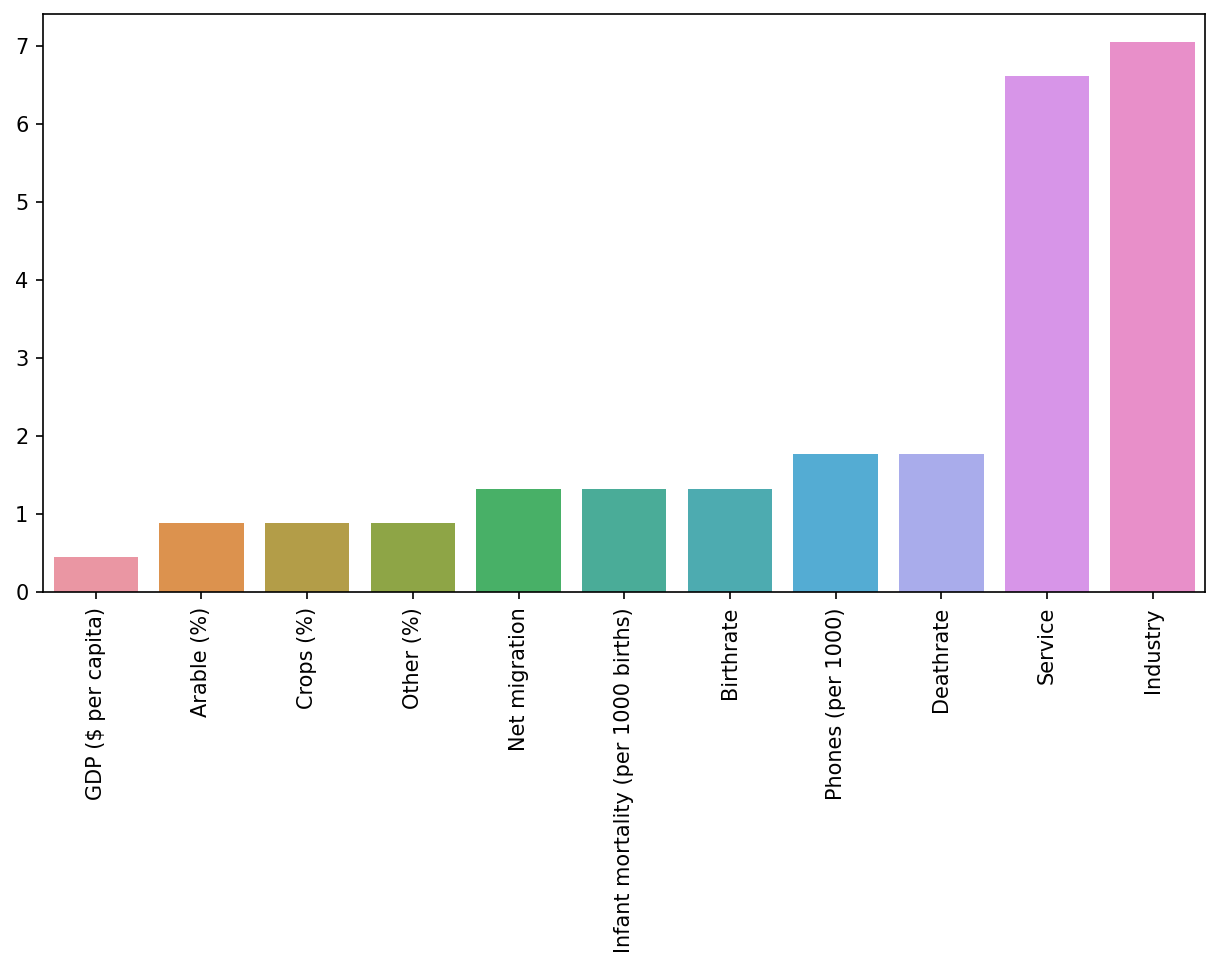

In [38]:
null_perc(df)

In [39]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [40]:
df['GDP ($ per capita)'] = df['GDP ($ per capita)'].fillna(df.groupby('Region')['GDP ($ per capita)'].transform('mean'))

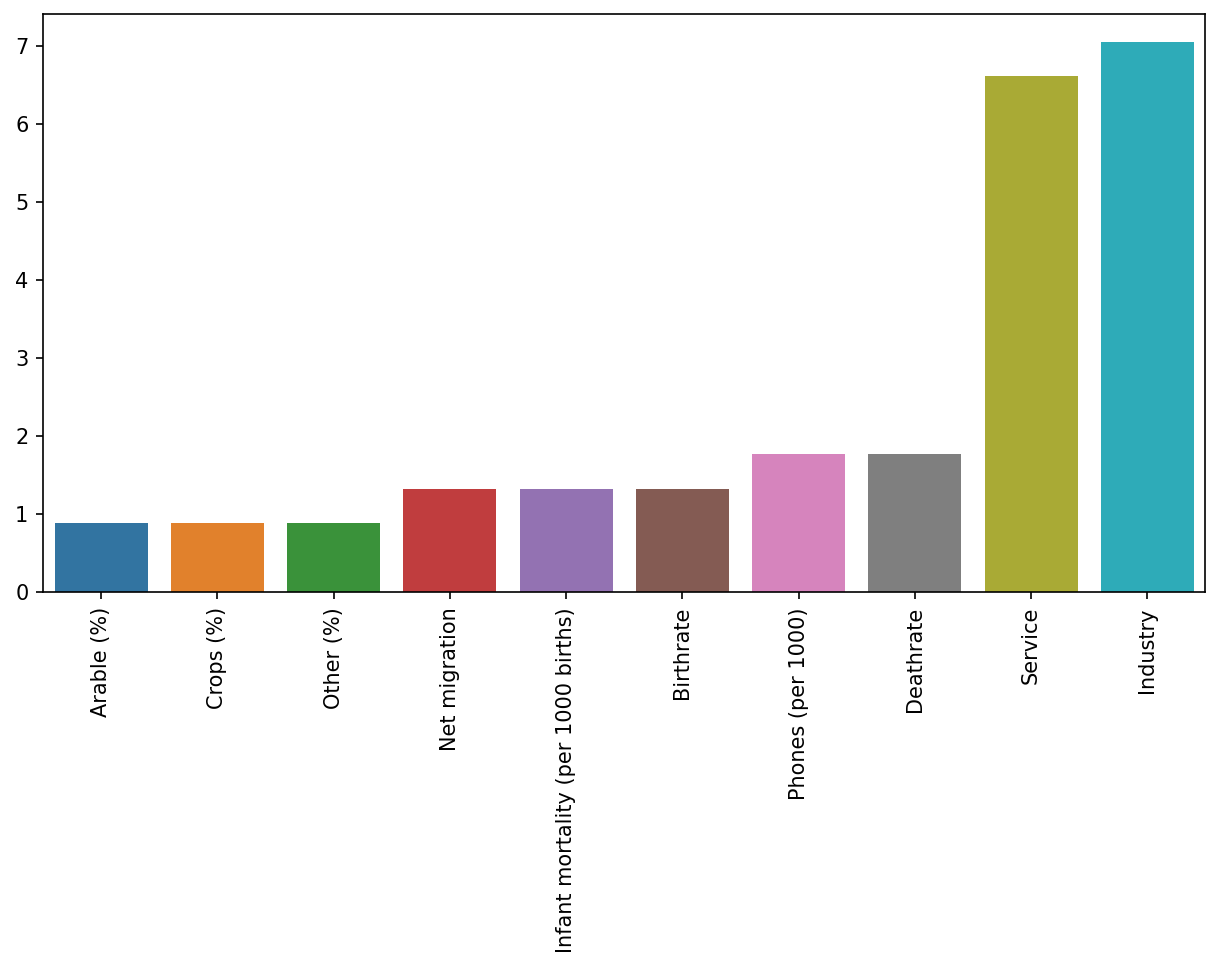

In [41]:
null_perc(df)

In [45]:
df['Arable (%)'] = df['Arable (%)'].fillna(df.groupby('Region')['Arable (%)'].transform('mean'))

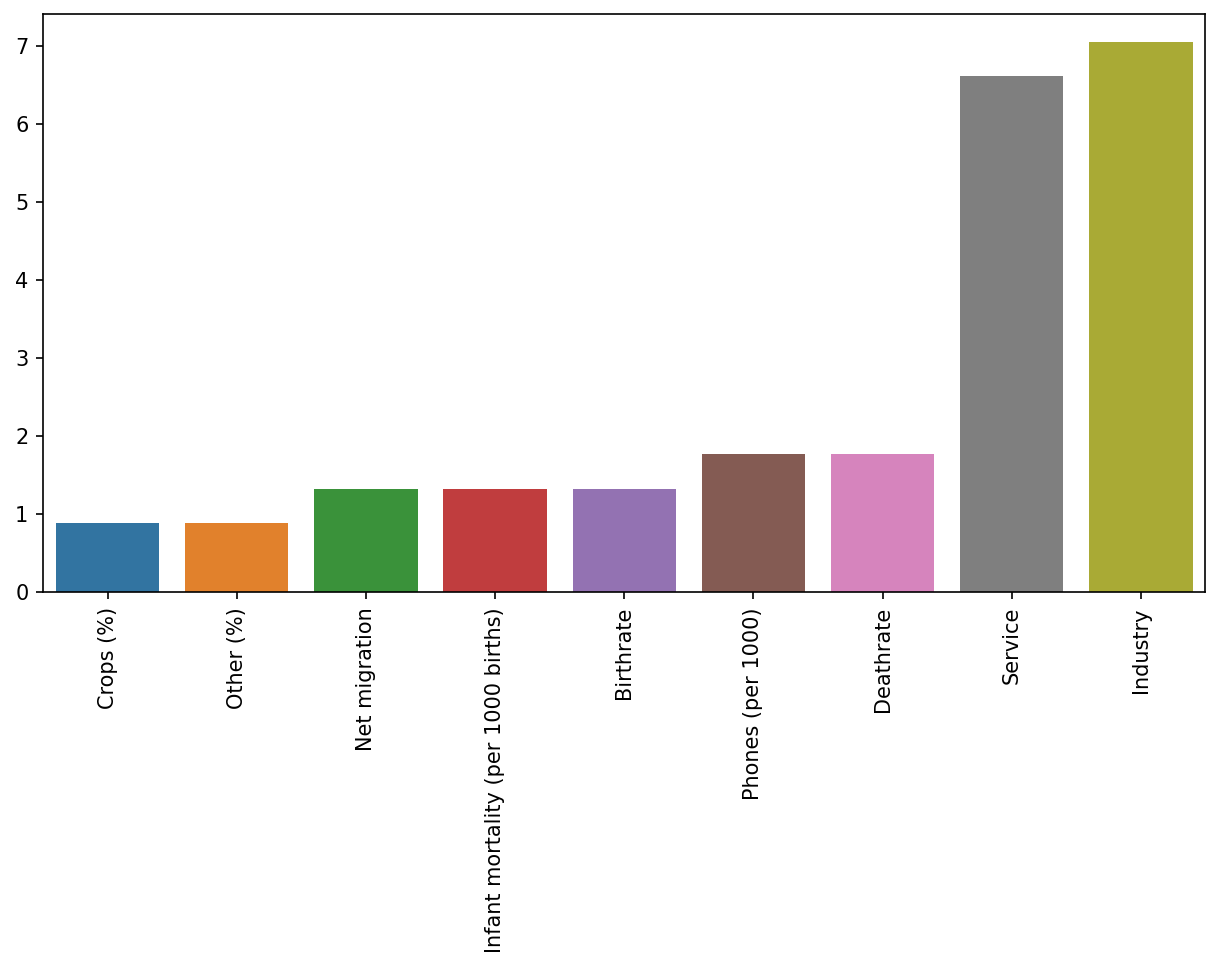

In [46]:
null_perc(df)

In [47]:
df['Crops (%)'] = df['Crops (%)'].fillna(df.groupby('Region')['Crops (%)'].transform('mean'))

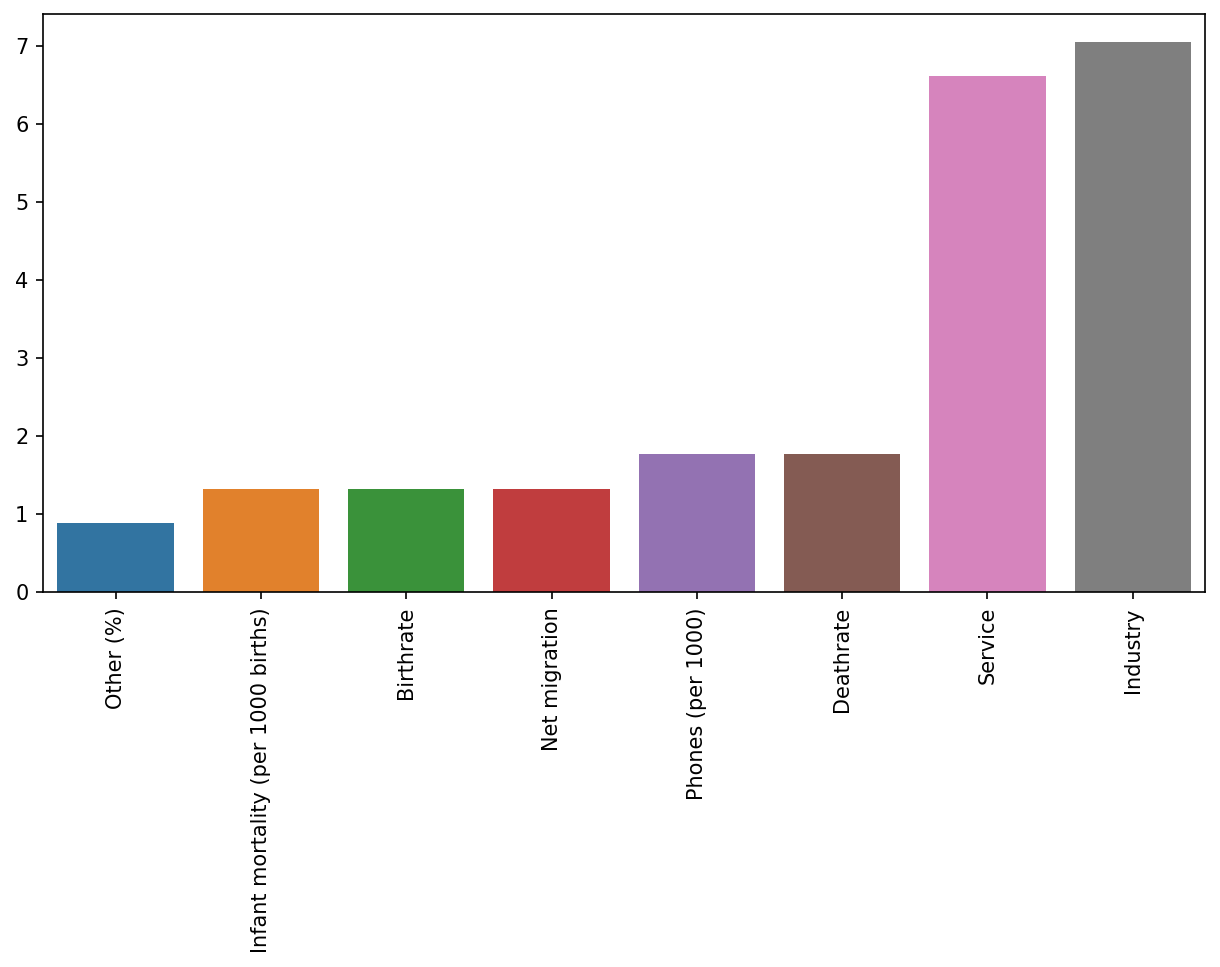

In [48]:
null_perc(df)

In [49]:
df['Net migration'] = df['Net migration'].fillna(df.groupby('Region')['Net migration'].transform('mean'))

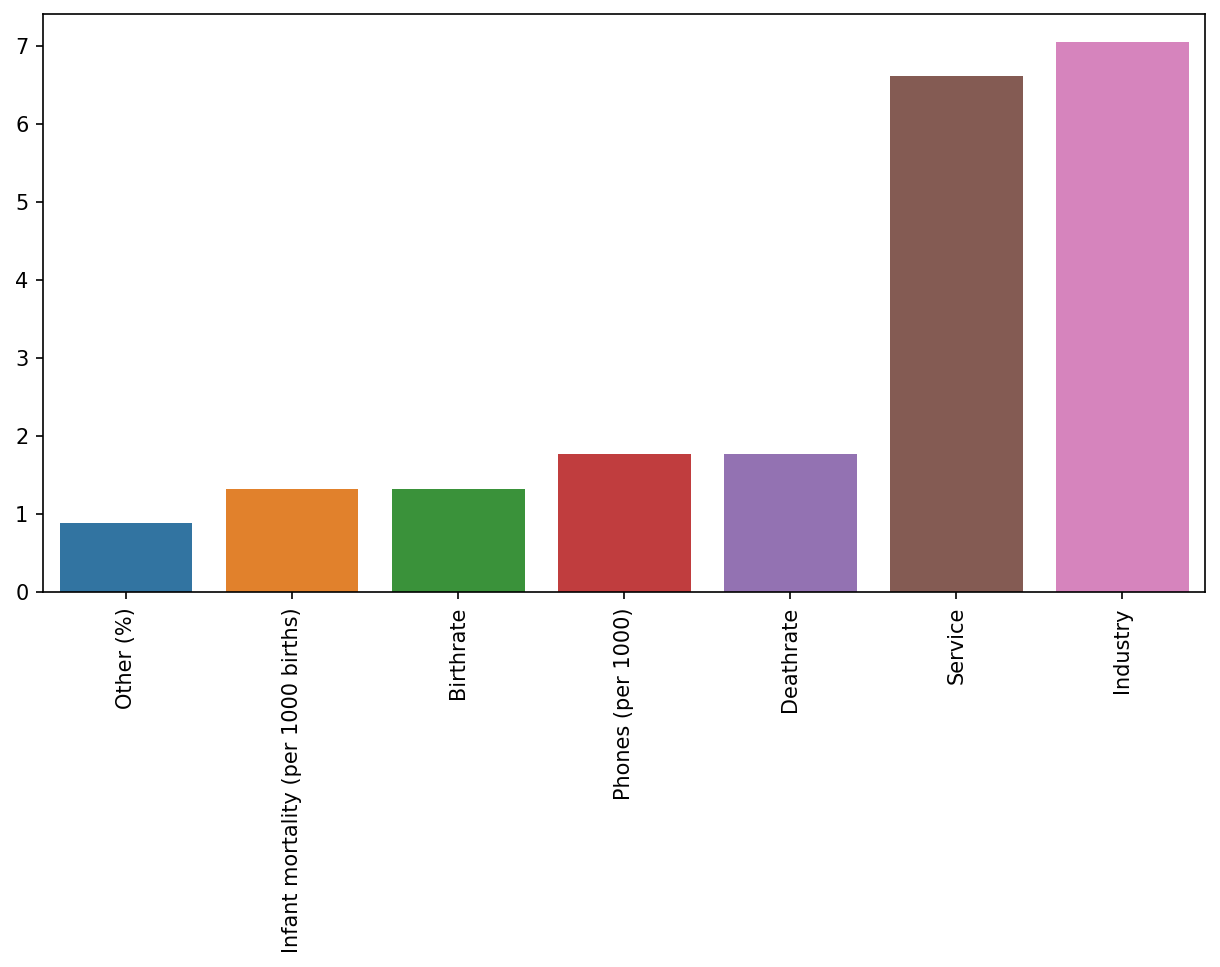

In [50]:
null_perc(df)

In [51]:
df['Infant mortality (per 1000 births)'] = df['Infant mortality (per 1000 births)'].fillna(df.groupby('Region')['Infant mortality (per 1000 births)'].transform('mean'))

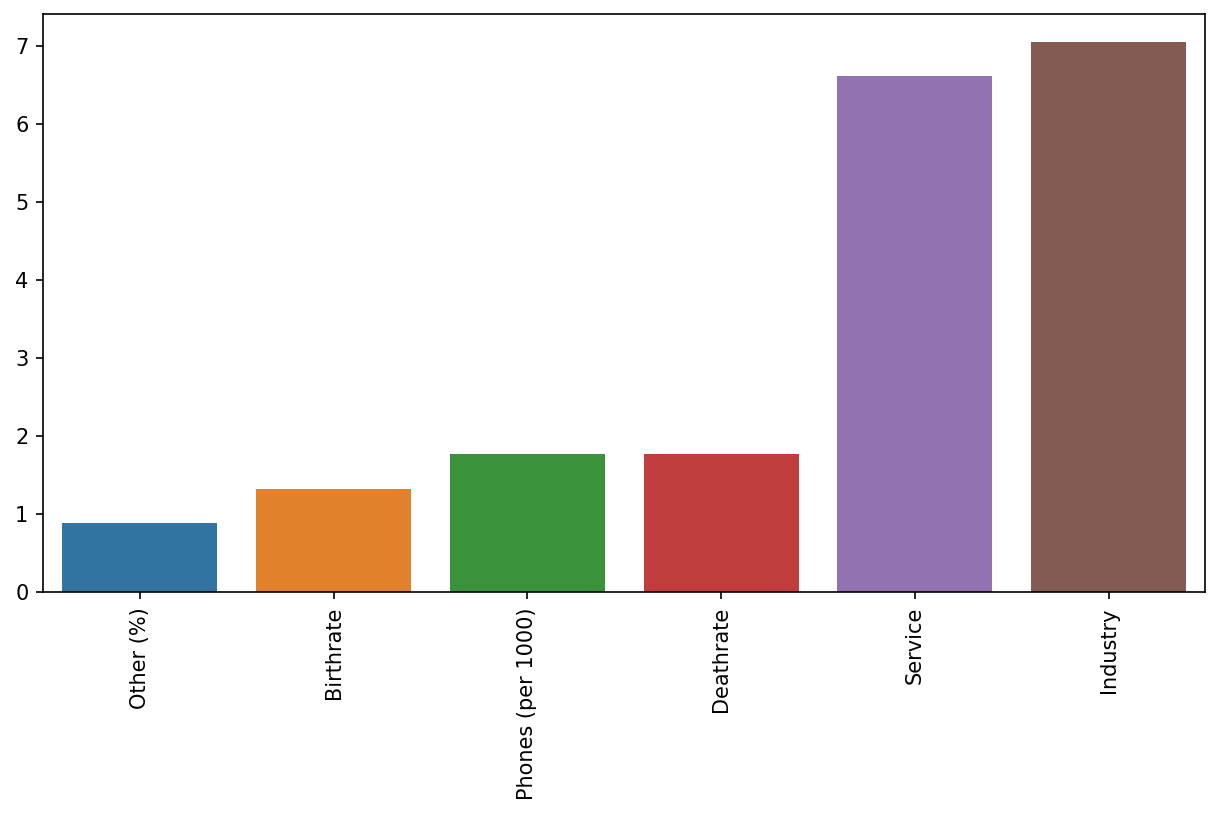

In [52]:
null_perc(df)

In [53]:
df['Birthrate'] = df['Birthrate'].fillna(df.groupby('Region')['Birthrate'].transform('mean'))

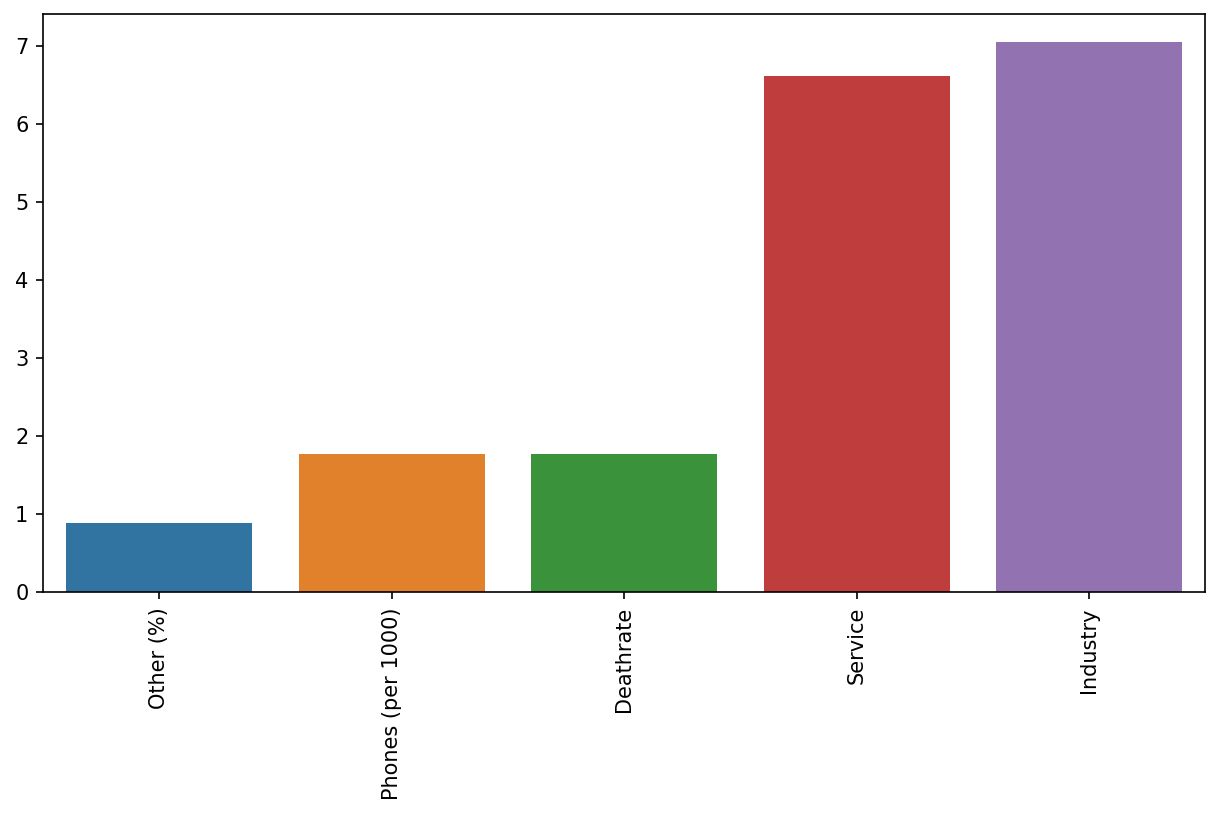

In [54]:
null_perc(df)

In [55]:
df['Phones (per 1000)'] = df['Phones (per 1000)'].fillna(df.groupby('Region')['Phones (per 1000)'].transform('mean'))

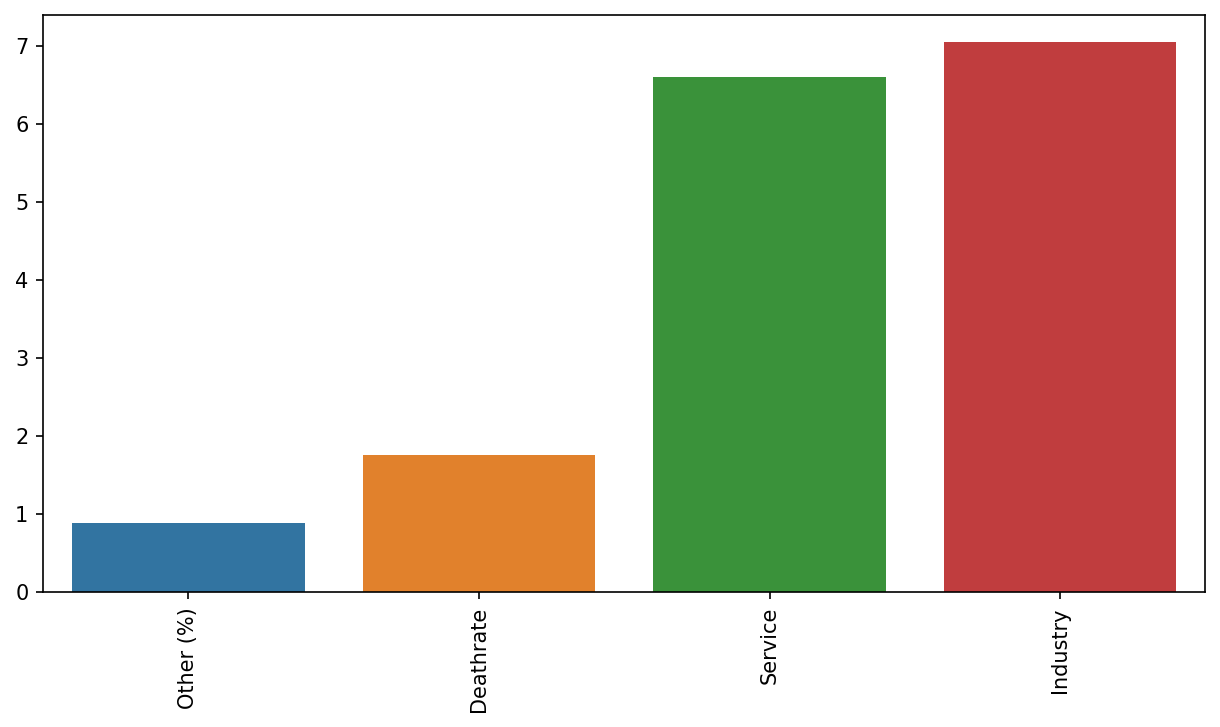

In [56]:
null_perc(df)

In [57]:
df['Deathrate'] = df['Deathrate'].fillna(df.groupby('Region')['Deathrate'].transform('mean'))

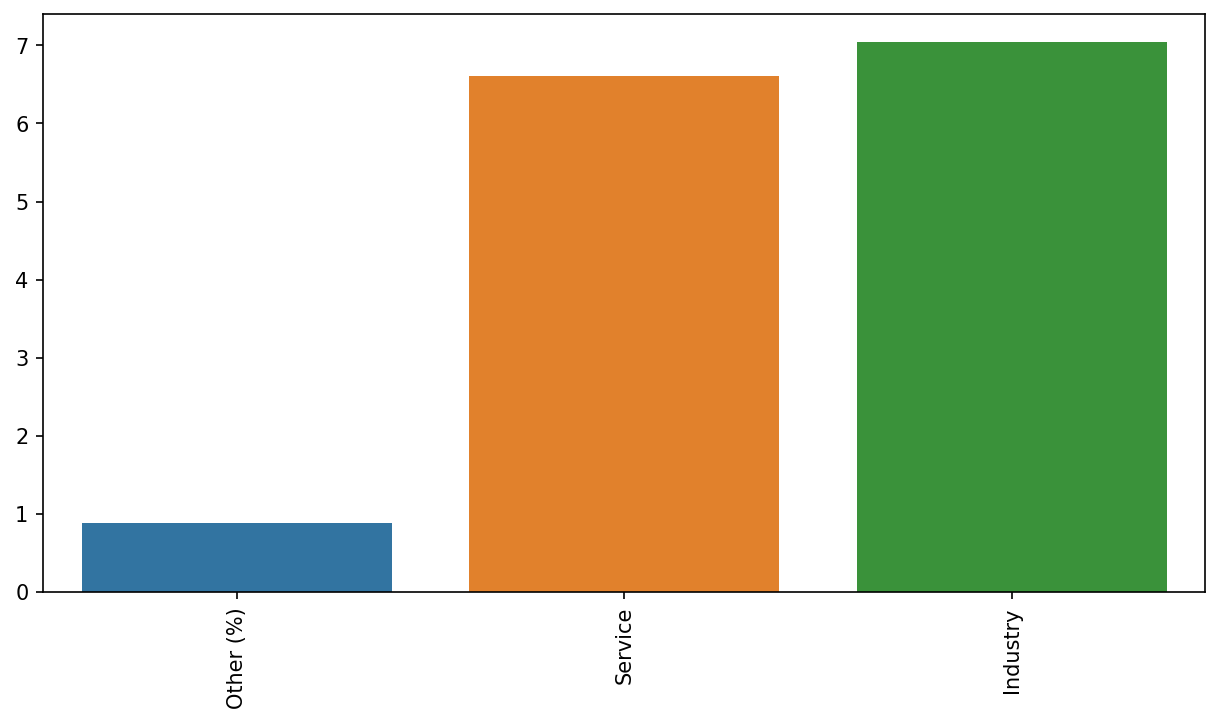

In [58]:
null_perc(df)

In [59]:
df['Service'] = df['Service'].fillna(df.groupby('Region')['Service'].transform('mean'))

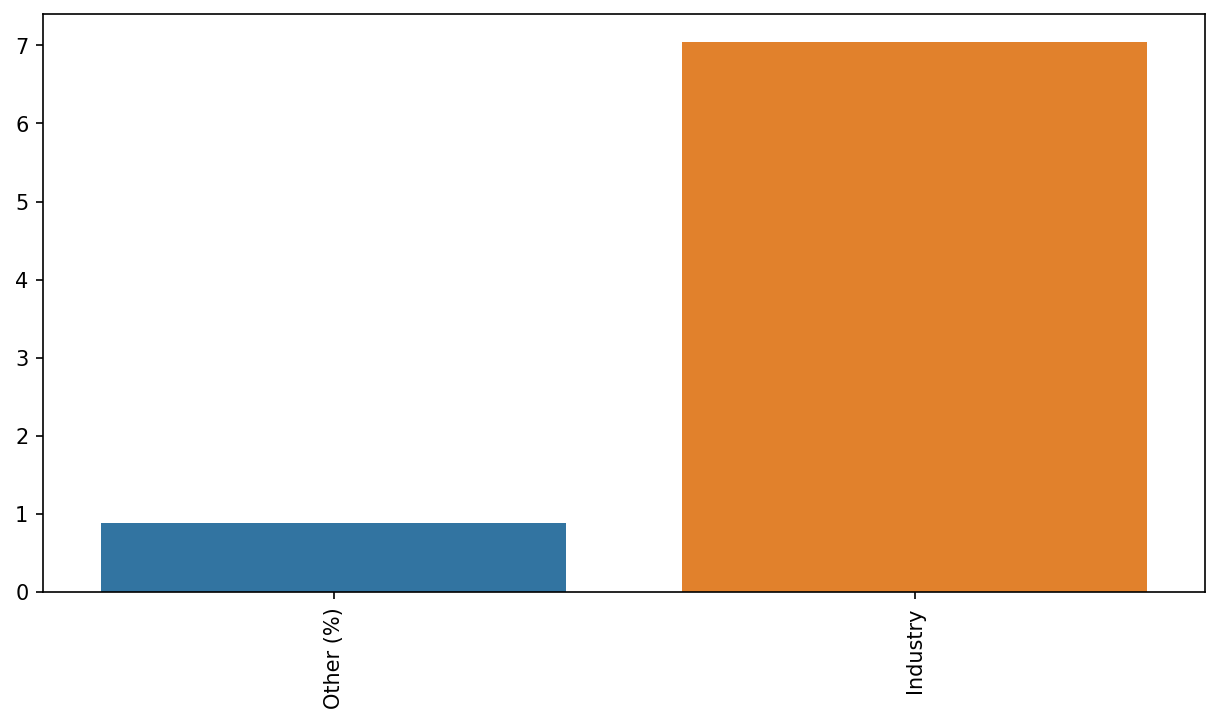

In [60]:
null_perc(df)

In [61]:
df['Industry'] = df['Industry'].fillna(df.groupby('Region')['Industry'].transform('mean'))

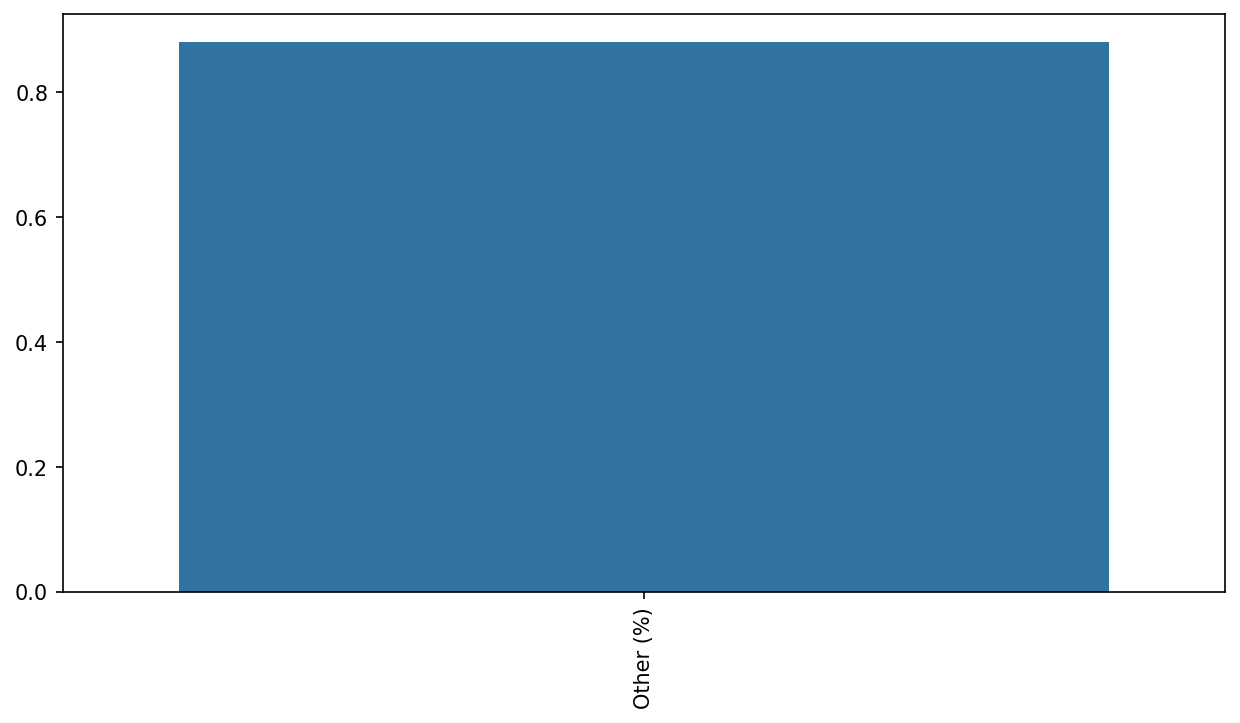

In [62]:
null_perc(df)

* I dont have any information about the Other% feature , as the null values are less than 1 % off the data I have decided to drop the observations with null values

In [63]:
df = df.dropna()

In [64]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             225 non-null    object 
 1   Region                              225 non-null    object 
 2   Population                          225 non-null    int64  
 3   Area (sq. mi.)                      225 non-null    int64  
 4   Pop. Density (per sq. mi.)          225 non-null    float64
 5   Coastline (coast/area ratio)        225 non-null    float64
 6   Net migration                       225 non-null    float64
 7   Infant mortality (per 1000 births)  225 non-null    float64
 8   GDP ($ per capita)                  225 non-null    float64
 9   Literacy (%)                        225 non-null    float64
 10  Phones (per 1000)                   225 non-null    float64
 11  Arable (%)                          225 non-n

In [66]:
X = df.drop('Country',axis=1)

* We are not using country because each observation in the dataset has a unique value for country

In [67]:
X = pd.get_dummies(X)

In [68]:
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.060,163.070,700.0,36.000000,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.930,21.520,4500.0,86.500000,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.390,31.000,6000.0,70.000000,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.710,9.270,8000.0,97.000000,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.600,4.050,19000.0,100.000000,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.980,19.620,800.0,79.521429,145.2,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,-0.432,30.916,5460.0,67.240000,100.2,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.000,61.500,800.0,50.200000,37.2,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.000,88.290,800.0,80.600000,8.2,7.08,...,0,0,0,0,0,0,0,0,1,0


In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [70]:
X_scaled

array([[ 0.01746016,  0.02451121, -0.19734736, ..., -0.32084447,
        -0.53452248, -0.36927447],
       [-0.21514132, -0.32051221, -0.15130134, ..., -0.32084447,
        -0.53452248, -0.36927447],
       [ 0.03331745,  0.9915439 , -0.21790577, ..., -0.32084447,
        -0.53452248, -0.36927447],
       ...,
       [-0.06381862, -0.04214013, -0.20179567, ..., -0.32084447,
        -0.53452248, -0.36927447],
       [-0.14808897,  0.08312402, -0.21700409, ..., -0.32084447,
         1.87082869, -0.36927447],
       [-0.14186832, -0.11875041, -0.20738612, ..., -0.32084447,
         1.87082869, -0.36927447]])

In [71]:
from sklearn.cluster import KMeans
# model = KMeans()

In [72]:
ssd = []
for i in range(2,31):
  model = KMeans(n_clusters=i)
  model.fit_transform(X_scaled)
  ssd.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [73]:
ssd

[5505.817861645042,
 4960.12483398949,
 4605.92699589242,
 4296.254332194197,
 4015.1017890412422,
 3766.210067777858,
 3484.681131776684,
 3199.5402353517147,
 2953.2009302079096,
 2788.465237000205,
 2494.0341582761757,
 2286.443126354953,
 2144.3607639765523,
 2088.7254266618647,
 1941.7013594101718,
 1848.2936250207504,
 1809.0917800992013,
 1702.5573222621542,
 1671.7058557754233,
 1555.11993400971,
 1541.8197573450452,
 1487.3129829185664,
 1441.4265392401426,
 1397.3501174049732,
 1353.497978746147,
 1307.188227504806,
 1270.5364076318986,
 1261.0185213197553,
 1208.4926637523076]

Text(0, 0.5, ' Sum of Squared Distances')

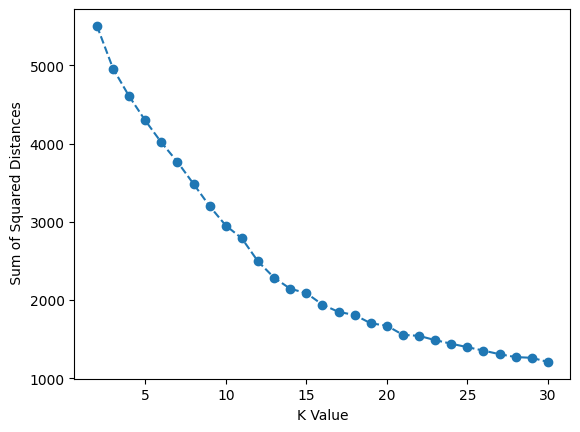

In [74]:
plt.plot(list(range(2,31)),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<Axes: >

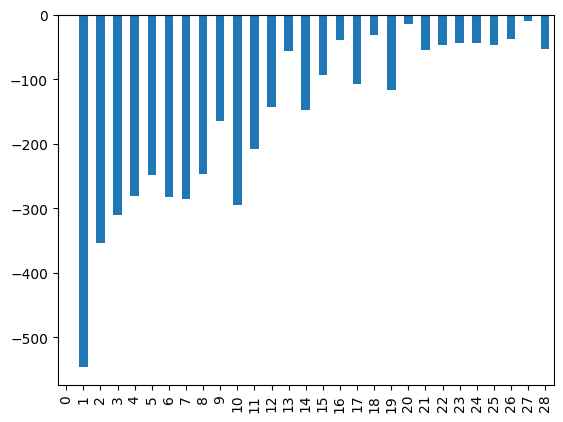

In [75]:
pd.Series(ssd).diff().plot(kind='bar')

* We can see that there is a big drop in ssd from clusters 2-3
* I have decided to take 3 clusters

In [76]:
model = KMeans(n_clusters=3)

In [77]:
model.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [78]:
model.labels_

array([2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2,
       0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0,
       1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2], dtype=int32)

In [79]:
df['Label'] = model.labels_

<ipython-input-79-6a207d6c702d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = model.labels_


In [80]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.060,163.070,700.0,36.000000,...,12.13,0.22,87.65,1.0,46.600,20.340,0.380,0.240000,0.380000,2
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.930,21.520,4500.0,86.500000,...,21.09,4.42,74.49,3.0,15.110,5.220,0.232,0.188000,0.579000,1
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.390,31.000,6000.0,70.000000,...,3.22,0.25,96.53,1.0,17.140,4.610,0.101,0.600000,0.298000,1
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.710,9.270,8000.0,97.000000,...,10.00,15.00,75.00,2.0,22.460,3.270,0.000,0.215250,0.608938,1
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.600,4.050,19000.0,100.000000,...,2.22,0.00,97.78,3.0,8.710,6.250,0.000,0.246083,0.714625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.980,19.620,800.0,79.521429,...,16.90,18.97,64.13,3.0,31.670,3.920,0.090,0.280000,0.630000,1
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,-0.432,30.916,5460.0,67.240000,...,0.02,0.00,99.98,1.0,20.814,4.806,0.000,0.426200,0.400000,1
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.000,61.500,800.0,50.200000,...,2.78,0.24,96.98,1.0,42.890,8.300,0.135,0.472000,0.393000,2
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000,88.290,800.0,80.600000,...,7.08,0.03,92.90,2.0,41.000,19.930,0.220,0.290000,0.489000,2


In [81]:
df['Label'].value_counts()

1    113
0     58
2     54
Name: Label, dtype: int64

# Interpretation

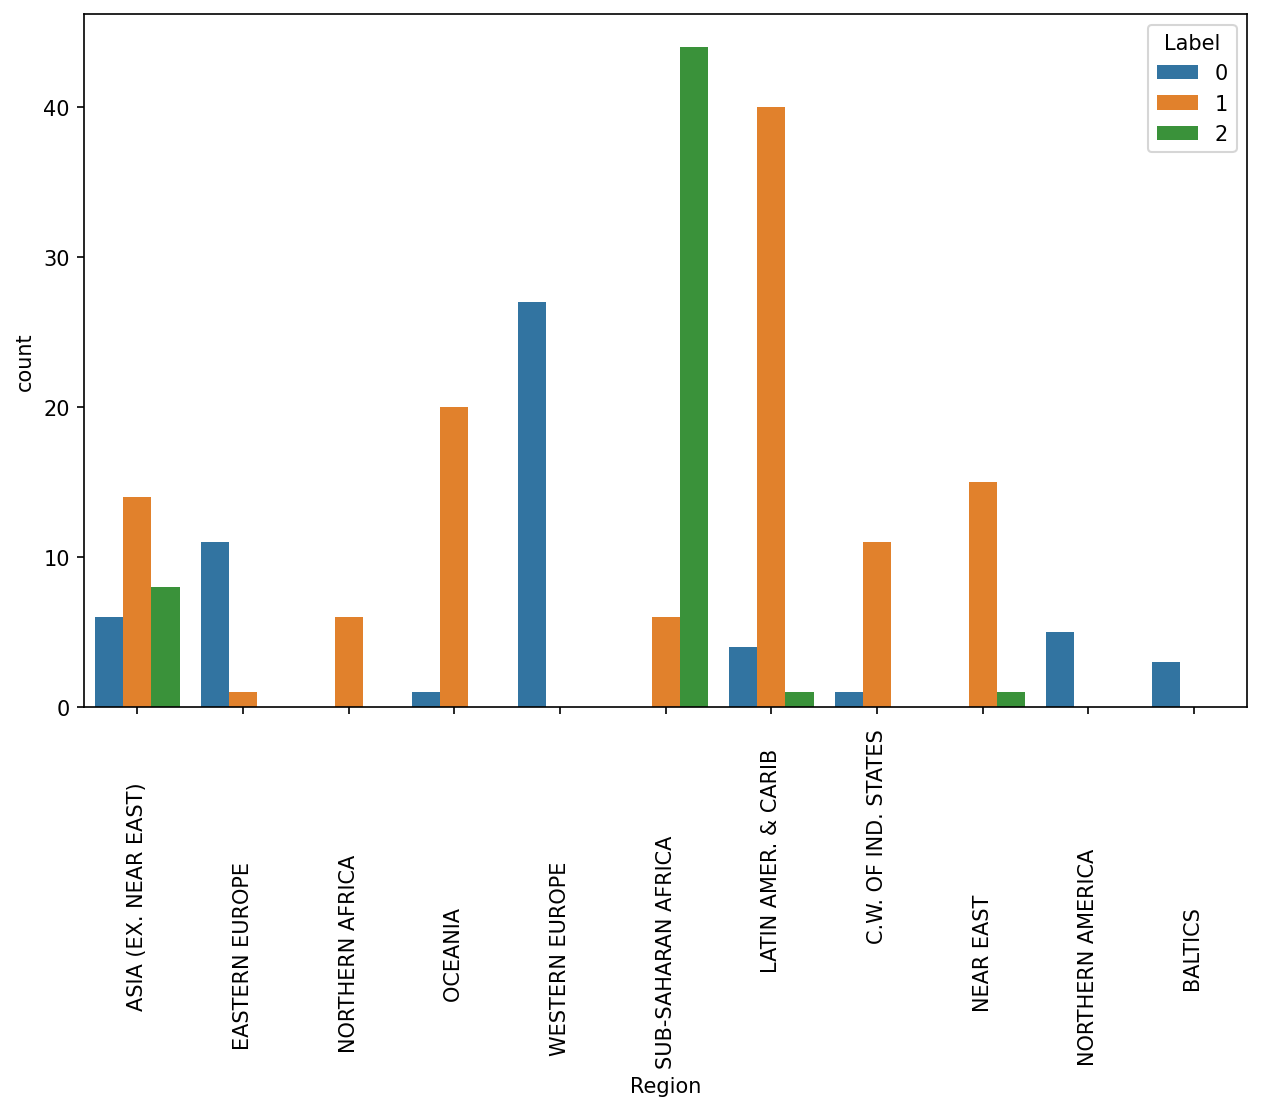

In [83]:
plt.figure(figsize=(10,6),dpi=150)
sns.countplot(x='Region',data=df,hue='Label')
plt.xticks(rotation=90);

* We can see that there is a huge difference of labels for every ragion

<Axes: xlabel='Label', ylabel='GDP ($ per capita)'>

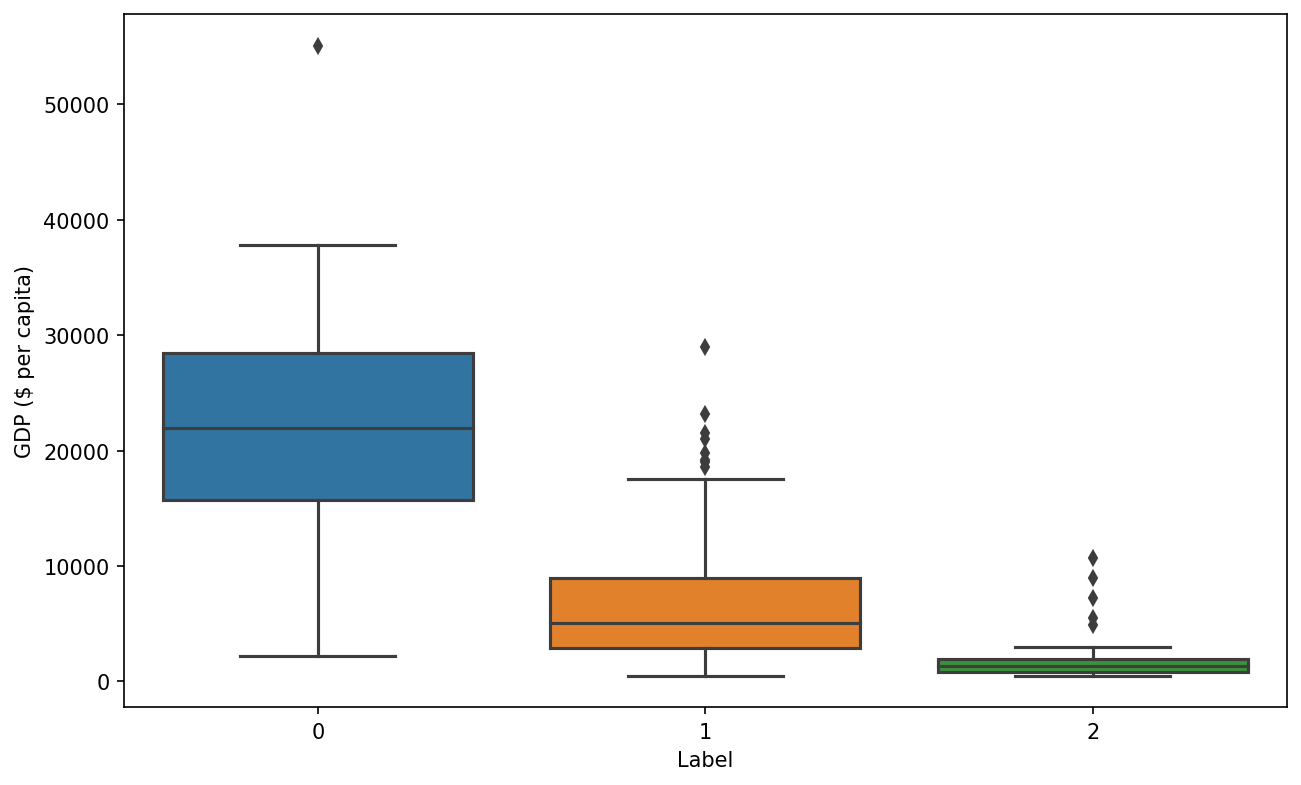

In [88]:
plt.figure(figsize=(10,6),dpi=150)
sns.boxplot(x='Label',y='GDP ($ per capita)',data=df)

* there are different GDP's for different labels
* label 0 has the highest GDP, label 2 has the lowest GDP

<Axes: xlabel='Label', ylabel='Infant mortality (per 1000 births)'>

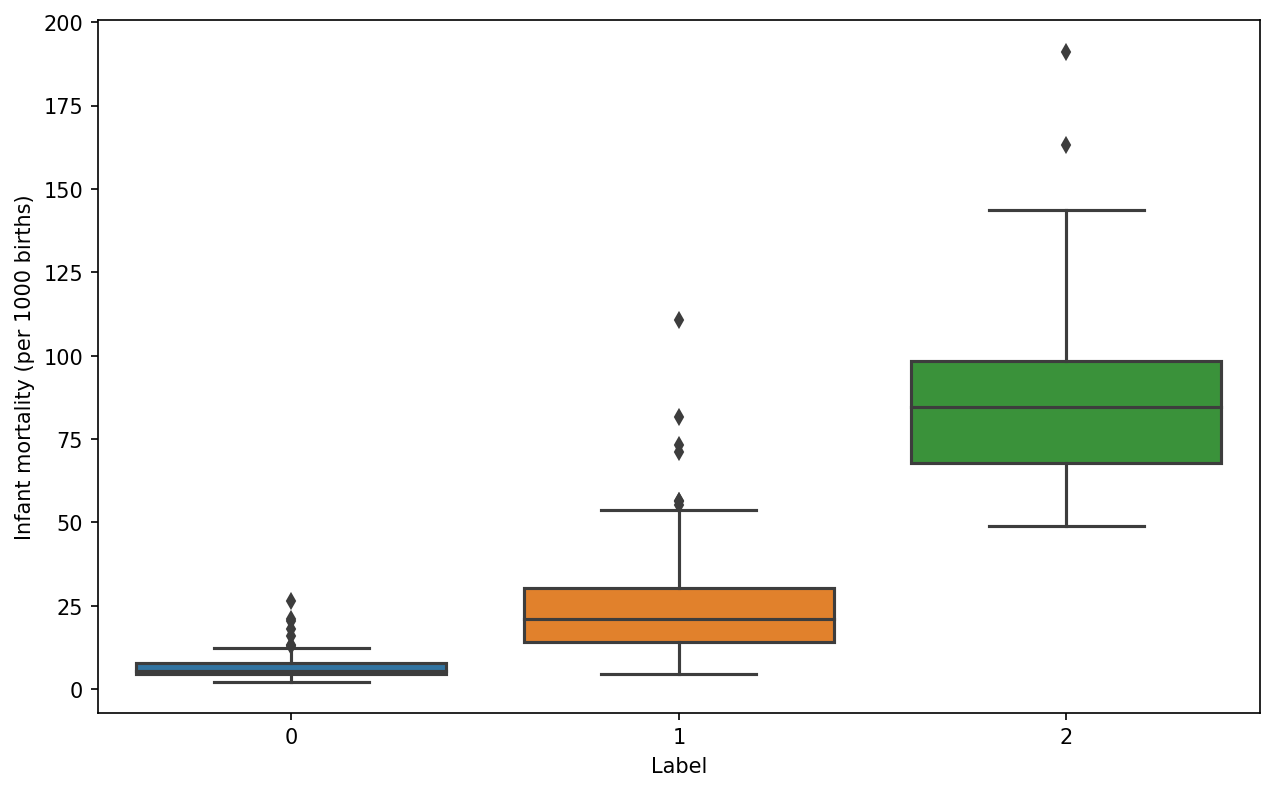

In [89]:
plt.figure(figsize=(10,6),dpi=150)
sns.boxplot(x='Label',y='Infant mortality (per 1000 births)',data=df)

* Infant Moratality is highest for Label 2 and lowest for Label 1

<Axes: xlabel='Label', ylabel='Industry'>

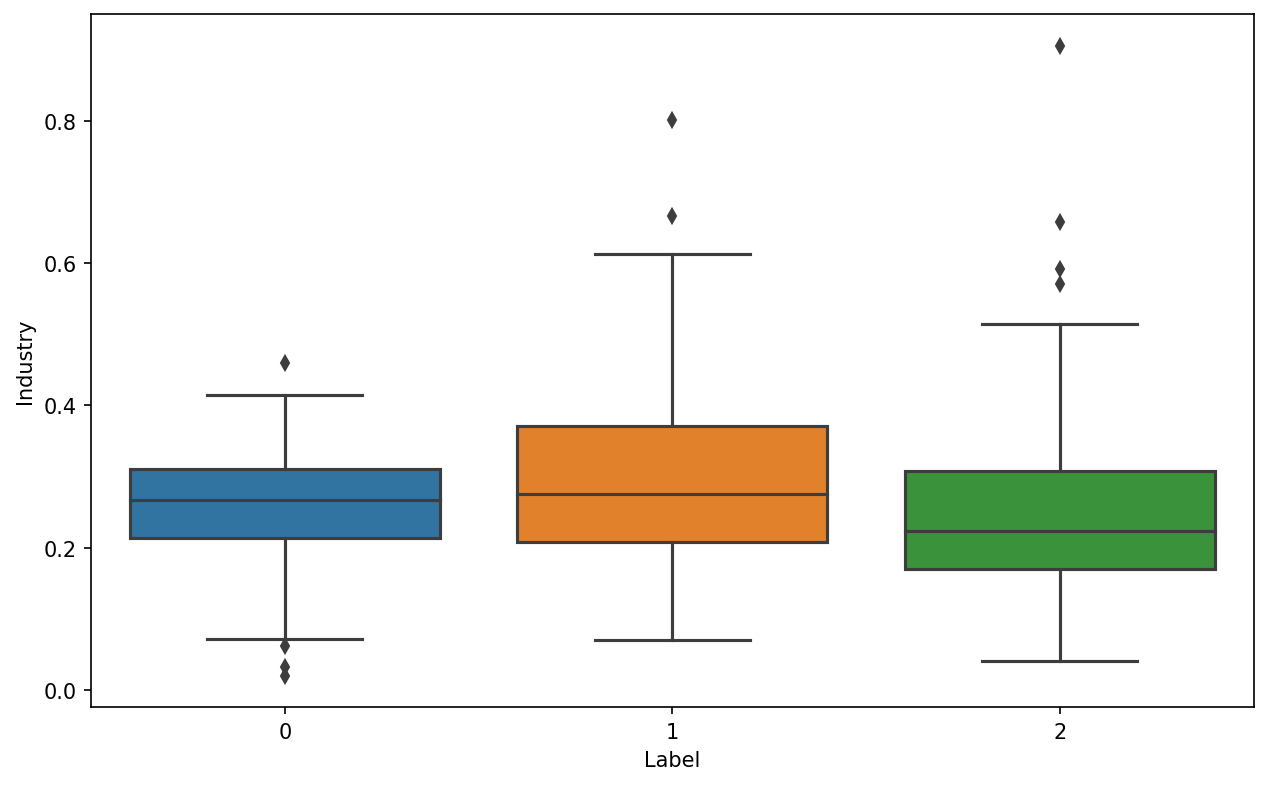

In [90]:
plt.figure(figsize=(10,6),dpi=150)
sns.boxplot(x='Label',y='Industry',data=df)

* There is not much difference in industry for different labels
* Industry is slightly less for label 2

<Axes: xlabel='Label', ylabel='Literacy (%)'>

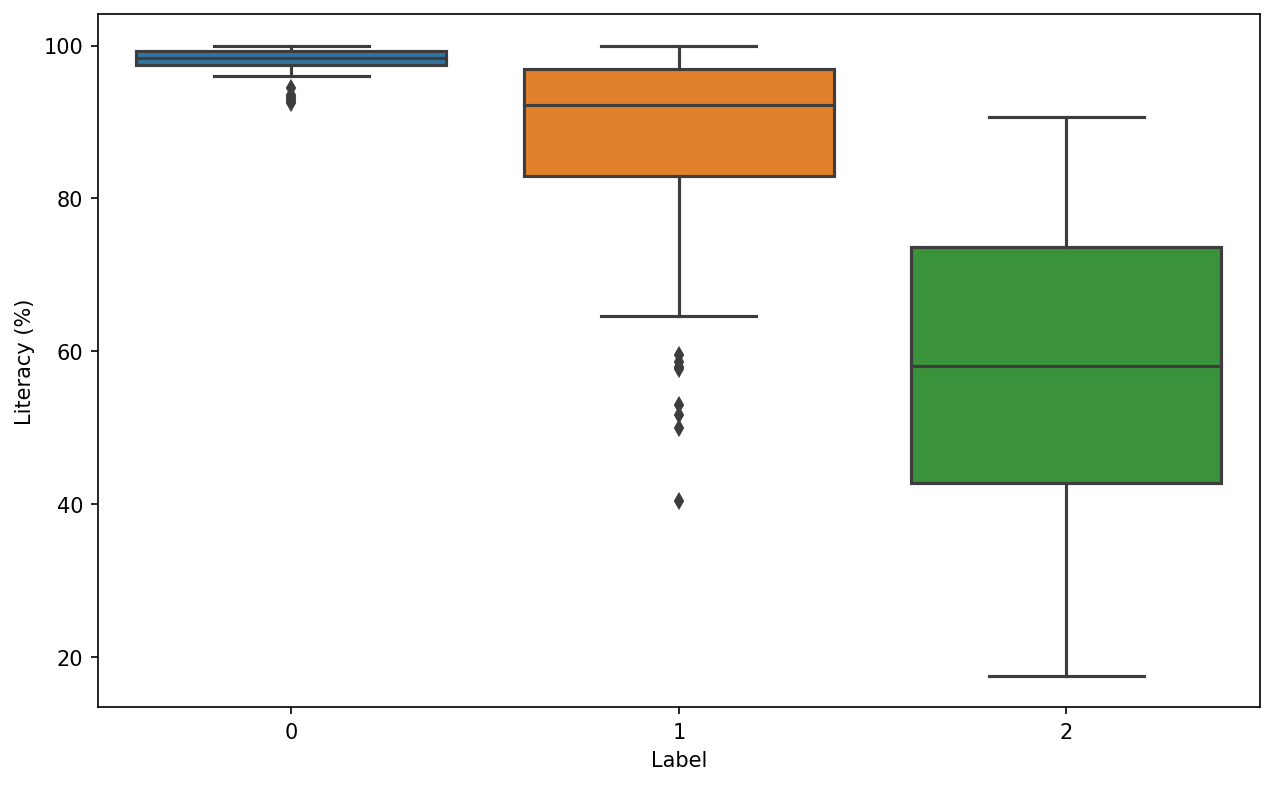

In [91]:
plt.figure(figsize=(10,6),dpi=150)
sns.boxplot(x='Label',y='Literacy (%)',data=df)

* literacy percent is highest for label 0 and lowest for label 2

<Axes: xlabel='Label', ylabel='Phones (per 1000)'>

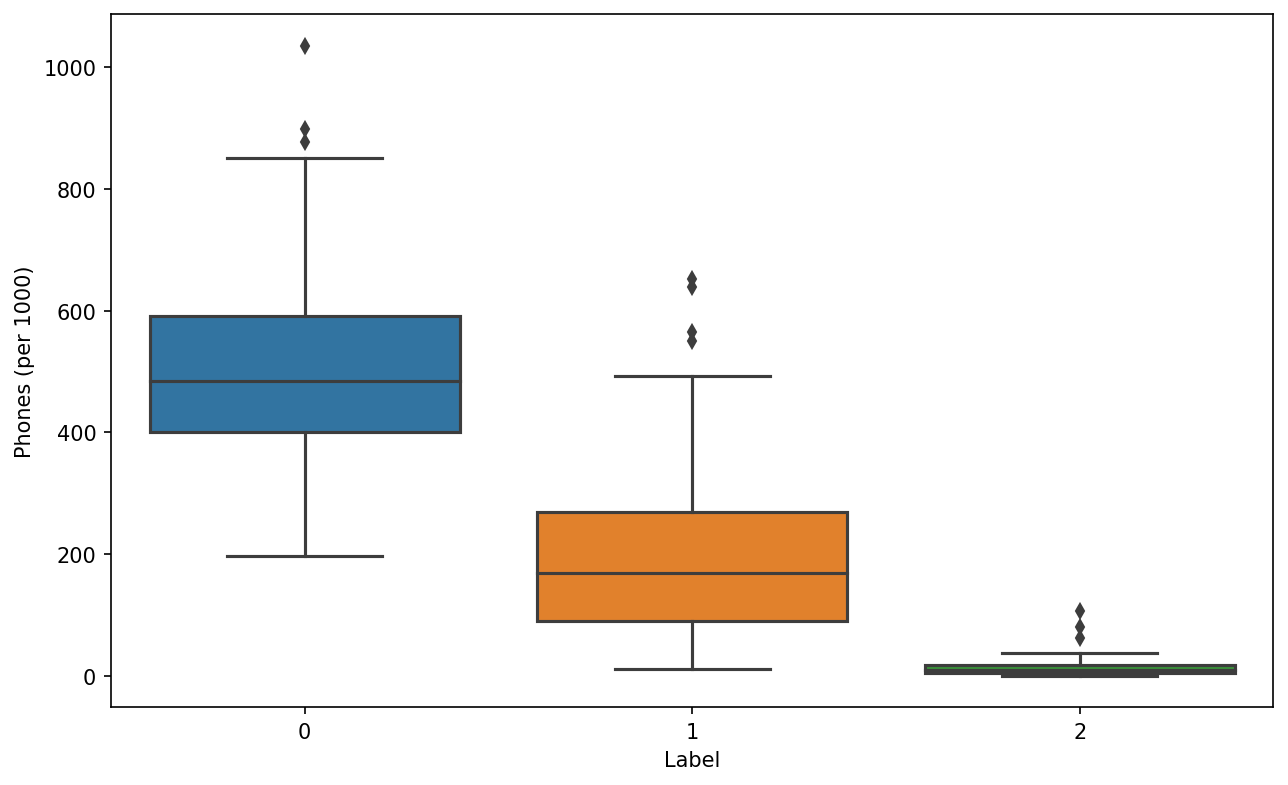

In [93]:
plt.figure(figsize=(10,6),dpi=150)
sns.boxplot(x='Label',y='Phones (per 1000)',data=df)

* Phones per 100 is highest for label 0 and lowest for label 2
* This is correlating to GDP and Literacy
* Maybe the model has clustered countries based on how developed they are with label 0 being developed ,label 1 being developing, label 2 being under developed countries

<Axes: xlabel='Label', ylabel='Arable (%)'>

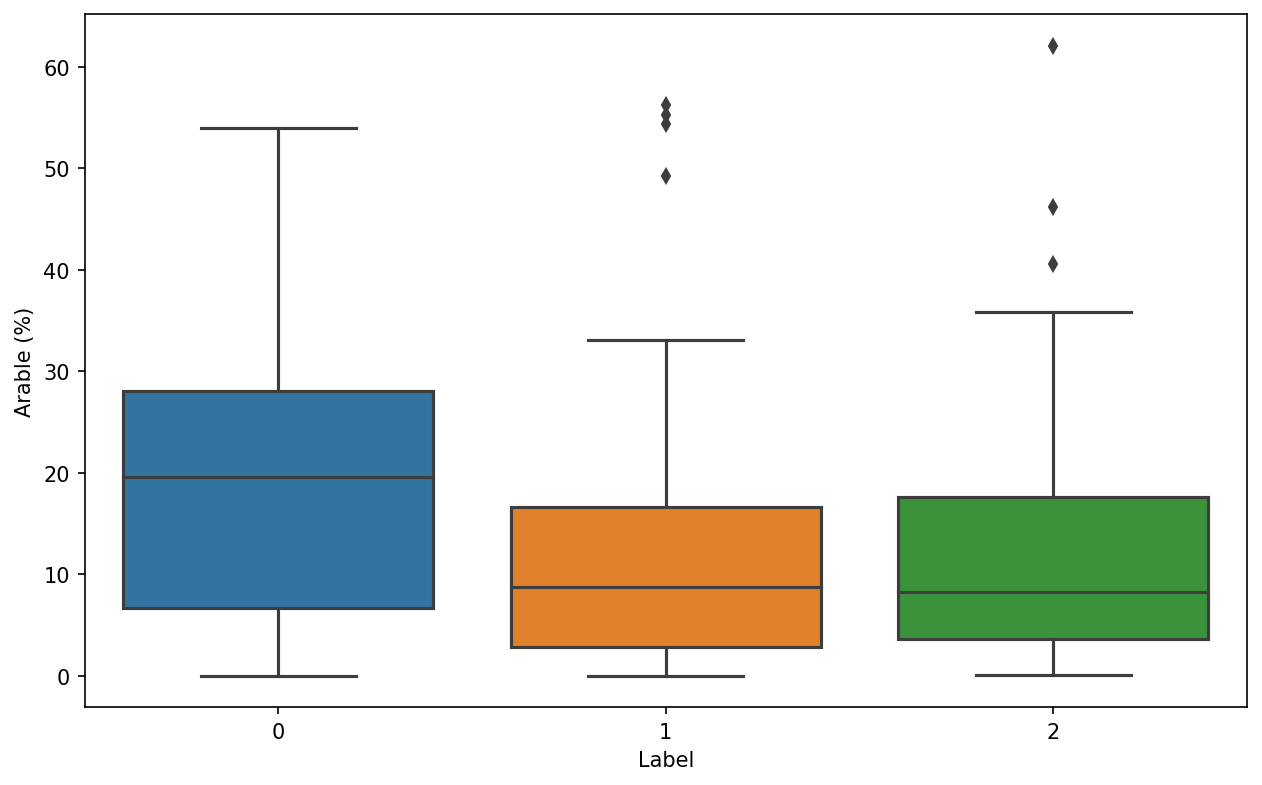

In [94]:
plt.figure(figsize=(10,6),dpi=150)
sns.boxplot(x='Label',y='Arable (%)',data=df)

* Arabelle is almost same for label 1,2
* arabelle is slightly more for label 0

* we will check the assumption that the clustering is based on how developed the country is

In [102]:
df[df['Country']=='United States']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Label
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.5,37800.0,97.0,...,19.13,0.22,80.65,3.0,14.14,8.26,0.01,0.204,0.787,0


* We know that Unites States is a developed nation , It was givel label 0 Which is the same as our assumption about the model

In [103]:
df[df['Country']=='India']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Label
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,...,54.4,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538,1


* We know that India is a developing nation , It was givel label 1 Which is the same as our assumption about the model

In [104]:
df[df['Country']=='Pakistan']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Label
156,Pakistan,ASIA (EX. NEAR EAST),165803560,803940,206.2,0.13,-2.77,72.44,2100.0,45.7,...,27.87,0.87,71.26,1.0,29.74,8.23,0.216,0.251,0.533,2


* We know that Pakistan is a Under developed nation , It was givel label 2 Which is the same as our assumption about the model